In [388]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings 
warnings.filterwarnings('ignore')

In [253]:
df=pd.read_csv('Airline Quality Ratings.csv')
df.head()

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   
4   5  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   
4  ...                 3             4                 4            5   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   
4               4                  3                       3   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  
4                        3                 3                Satisfied  

[5 rows x 24 columns]

In [254]:
df.shape

(129880, 24)

In [255]:
df.drop(columns=['ID'],axis=1,inplace=True)

In [256]:
df.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                       3  ...                 3             5   
1                       2  ...                 5             4   
2                       4  ...                 3             5   
3                       2  ...                 5             5   
4                       3  ...                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
1                 5            5               3                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
4                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  
0  Neutral or Dissatisfied  
1                Satisfied  
2                Satisfied  
3                Satisfied  
4                Satisfied  

[5 rows x 23 columns]

In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [258]:
df.isnull().values.any()

True

In [259]:
df.apply(pd.isnull).sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [260]:
df.describe()

Age  Flight Distance  Departure Delay  Arrival Delay  \
count  129880.000000    129880.000000    129880.000000  129487.000000   
mean       39.427957      1190.316392        14.713713      15.091129   
std        15.119360       997.452477        38.071126      38.465650   
min         7.000000        31.000000         0.000000       0.000000   
25%        27.000000       414.000000         0.000000       0.000000   
50%        40.000000       844.000000         0.000000       0.000000   
75%        51.000000      1744.000000        12.000000      13.000000   
max        85.000000      4983.000000      1592.000000    1584.000000   

       Departure and Arrival Time Convenience  Ease of Online Booking  \
count                           129880.000000           129880.000000   
mean                                 3.057599                2.756876   
std                                  1.526741                1.401740   
min                                  0.000000                0.000000   
25%                                  2.000000                2.000000   
50%                                  3.000000                3.000000   
75%                                  4.000000                4.000000   
max                                  5.000000                5.000000   

       Check-in Service  Online Boarding  Gate Location  On-board Service  \
count     129880.000000    129880.000000  129880.000000     129880.000000   
mean           3.306267         3.252633       2.976925          3.383023   
std            1.266185         1.350719       1.278520          1.287099   
min            0.000000         0.000000       0.000000          0.000000   
25%            3.000000         2.000000       2.000000          2.000000   
50%            3.000000         3.000000       3.000000          4.000000   
75%            4.000000         4.000000       4.000000          4.000000   
max            5.000000         5.000000       5.000000          5.000000   

        Seat Comfort  Leg Room Service    Cleanliness  Food and Drink  \
count  129880.000000     129880.000000  129880.000000   129880.000000   
mean        3.441361          3.350878       3.286326        3.204774   
std         1.319289          1.316252       1.313682        1.329933   
min         0.000000          0.000000       0.000000        0.000000   
25%         2.000000          2.000000       2.000000        2.000000   
50%         4.000000          4.000000       3.000000        3.000000   
75%         5.000000          4.000000       4.000000        4.000000   
max         5.000000          5.000000       5.000000        5.000000   

       In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
count      129880.000000           129880.000000            129880.000000   
mean            3.642193                2.728696                 3.358077   
std             1.176669                1.329340                 1.334049   
min             0.000000                0.000000                 0.000000   
25%             3.000000                2.000000                 2.000000   
50%             4.000000                3.000000                 4.000000   
75%             5.000000                4.000000                 4.000000   
max             5.000000                5.000000                 5.000000   

       Baggage Handling  
count     129880.000000  
mean           3.632114  
std            1.180025  
min            1.000000  
25%            3.000000  
50%            4.000000  
75%            5.000000  
max            5.000000

In [261]:
df.duplicated().sum()

0

In [262]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [263]:
df.groupby('Gender').mean(numeric_only=True)

Age  Flight Distance  Departure Delay  Arrival Delay  \
Gender                                                               
Female  39.293935      1186.762955        14.582740       15.04152   
Male    39.565996      1193.976352        14.848611       15.14223   

        Departure and Arrival Time Convenience  Ease of Online Booking  \
Gender                                                                   
Female                                3.044067                2.748737   
Male                                  3.071537                2.765258   

        Check-in Service  Online Boarding  Gate Location  On-board Service  \
Gender                                                                       
Female          3.295710         3.312554       2.978012          3.374846   
Male            3.317141         3.190916       2.975805          3.391444   

        Seat Comfort  Leg Room Service  Cleanliness  Food and Drink  \
Gender                                                                
Female      3.481343          3.310612     3.282614        3.202507   
Male        3.400181          3.392351     3.290149        3.207108   

        In-flight Service  In-flight Wifi Service  In-flight Entertainment  \
Gender                                                                       
Female           3.597551                2.720967                 3.353025   
Male             3.688173                2.736656                 3.363280   

        Baggage Handling  
Gender                    
Female          3.589842  
Male            3.675654

In [264]:
df.groupby('Customer Type').mean(numeric_only=True)

Age  Flight Distance  Departure Delay  Arrival Delay  \
Customer Type                                                               
First-time     30.352565       714.115475        15.024054      15.475415   
Returning      41.462008      1297.046437        14.644156      15.004973   

               Departure and Arrival Time Convenience  Ease of Online Booking  \
Customer Type                                                                   
First-time                                   2.390454                2.703406   
Returning                                    3.207125                2.768860   

               Check-in Service  Online Boarding  Gate Location  \
Customer Type                                                     
First-time             3.222708         2.713162       2.988982   
Returning              3.324995         3.373544       2.974222   

               On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
Customer Type                                                                  
First-time             3.235744      3.005971          3.220648     3.060723   
Returning              3.416032      3.538944          3.380066     3.336890   

               Food and Drink  In-flight Service  In-flight Wifi Service  \
Customer Type                                                              
First-time           3.044659           3.700084                2.712532   
Returning            3.240660           3.629218                2.732319   

               In-flight Entertainment  Baggage Handling  
Customer Type                                             
First-time                    3.059378          3.694113  
Returning                     3.425024          3.618219

In [265]:
df.groupby('Type of Travel').mean(numeric_only=True)

Age  Flight Distance  Departure Delay  Arrival Delay  \
Type of Travel                                                               
Business        39.881429      1368.442019        14.864404      15.241165   
Personal        38.415856       792.759425        14.377386      14.755981   

                Departure and Arrival Time Convenience  \
Type of Travel                                           
Business                                      2.794856   
Personal                                      3.644014   

                Ease of Online Booking  Check-in Service  Online Boarding  \
Type of Travel                                                              
Business                      2.882678          3.292498         3.455175   
Personal                      2.476099          3.337000         2.800582   

                Gate Location  On-board Service  Seat Comfort  \
Type of Travel                                                  
Business             3.002486          3.434538      3.554146   
Personal             2.919875          3.268047      3.189638   

                Leg Room Service  Cleanliness  Food and Drink  \
Type of Travel                                                  
Business                3.473883     3.360730        3.266186   
Personal                3.076343     3.120263        3.067708   

                In-flight Service  In-flight Wifi Service  \
Type of Travel                                              
Business                 3.660732                2.822896   
Personal                 3.600816                2.518451   

                In-flight Entertainment  Baggage Handling  
Type of Travel                                             
Business                       3.494643          3.658190  
Personal                       3.053276          3.573917

In [266]:
df.groupby('Class').mean(numeric_only=True)

Age  Flight Distance  Departure Delay  Arrival Delay  \
Class                                                                      
Business      41.617278      1676.088256        14.304585      14.491805   
Economy       37.206863       743.998199        15.083829      15.615465   
Economy Plus  38.728934       747.089151        15.122835      15.803198   

              Departure and Arrival Time Convenience  Ease of Online Booking  \
Class                                                                          
Business                                    2.907915                2.915653   
Economy                                     3.192577                2.602926   
Economy Plus                                3.209967                2.661991   

              Check-in Service  Online Boarding  Gate Location  \
Class                                                            
Business              3.521010         3.719032       2.985103   
Economy               3.124423         2.814677       2.969576   
Economy Plus          3.014557         2.885559       2.968441   

              On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
Class                                                                         
Business              3.682529      3.763707          3.646042     3.481998   
Economy               3.119707      3.141813          3.083778     3.104821   
Economy Plus          3.036234      3.168207          3.056211     3.118478   

              Food and Drink  In-flight Service  In-flight Wifi Service  \
Class                                                                     
Business            3.329955           3.846268                2.775917   
Economy             3.086556           3.466497                2.673944   
Economy Plus        3.110403           3.382850                2.756030   

              In-flight Entertainment  Baggage Handling  
Class                                                    
Business                     3.639350          3.844852  
Economy                      3.096572          3.450617  
Economy Plus                 3.120497          3.351504

In [267]:
numerical_columns,categorical_columns=[],[]
for column in df.columns:
    if df[column].dtypes=='object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [268]:
numerical_columns

['Age',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'Food and Drink',
 'In-flight Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Baggage Handling']

In [269]:
categorical_columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

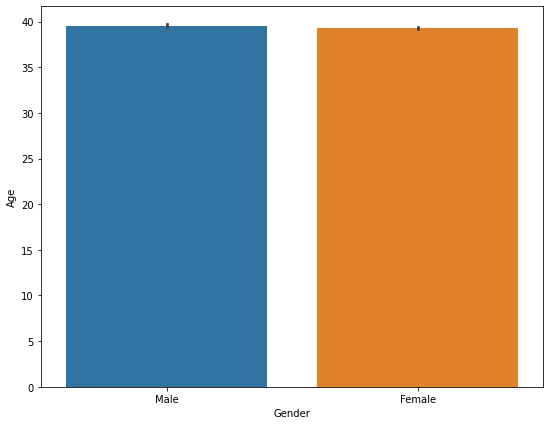

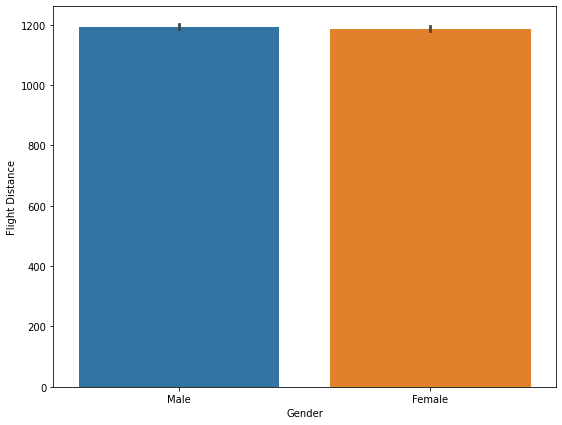

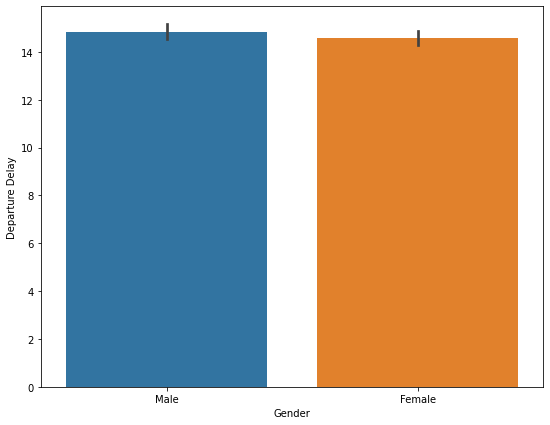

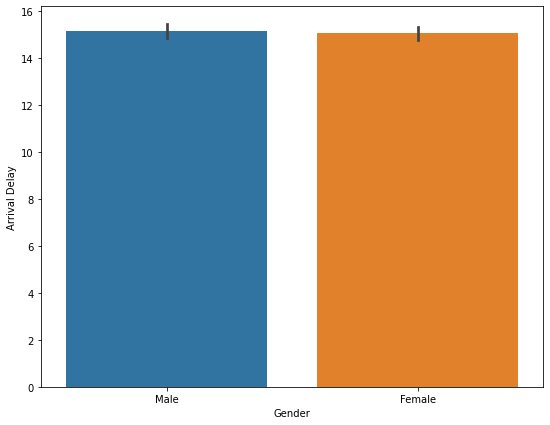

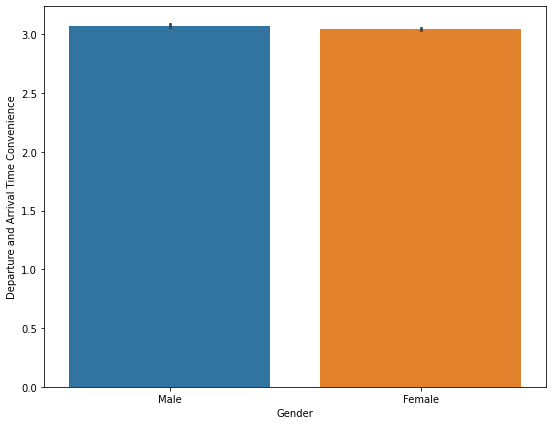

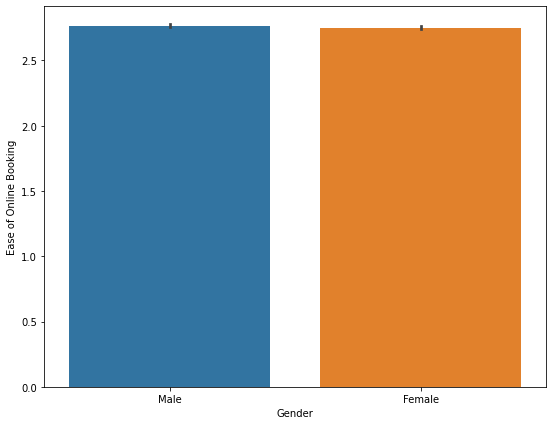

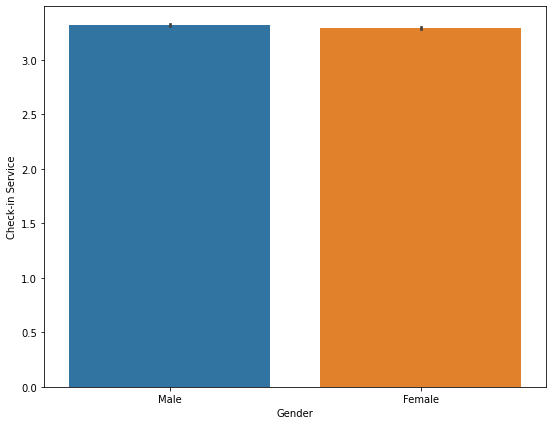

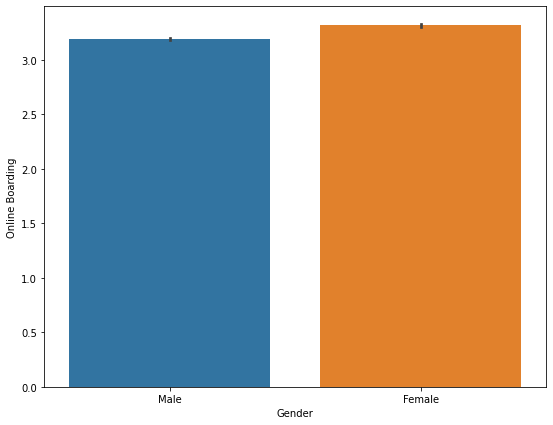

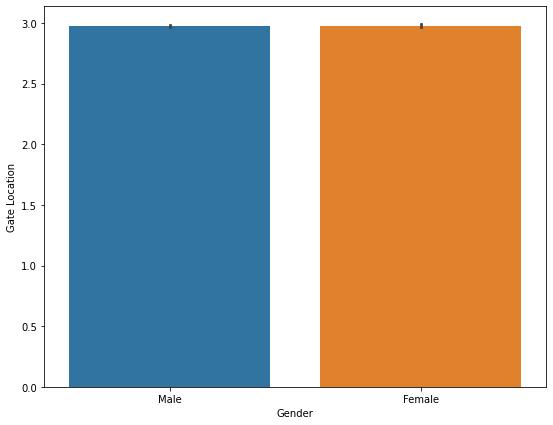

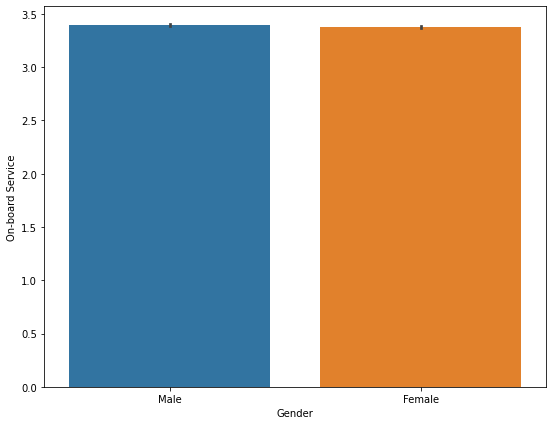

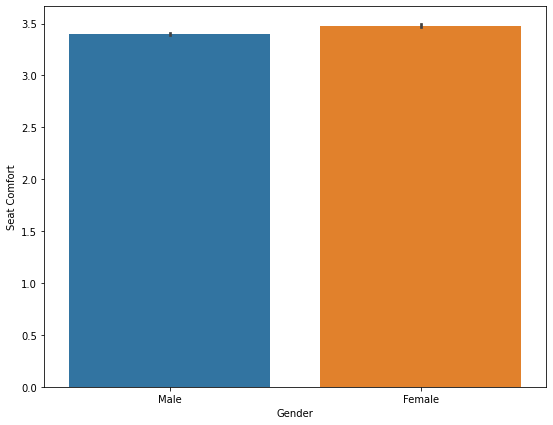

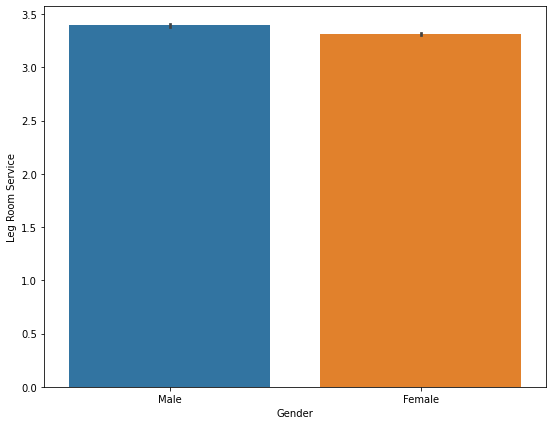

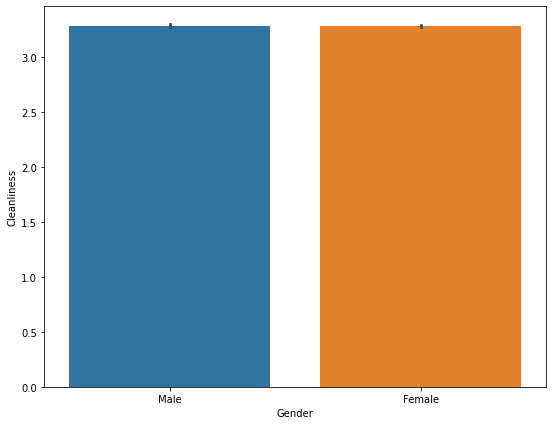

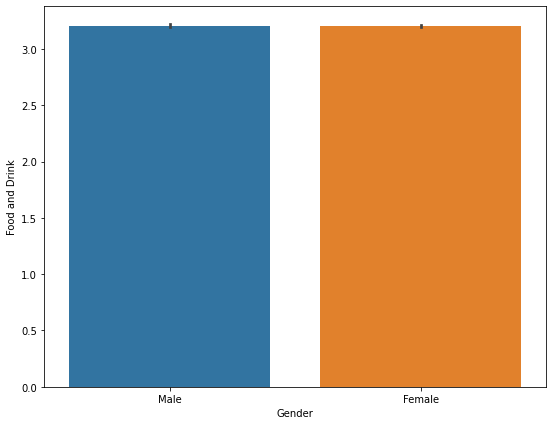

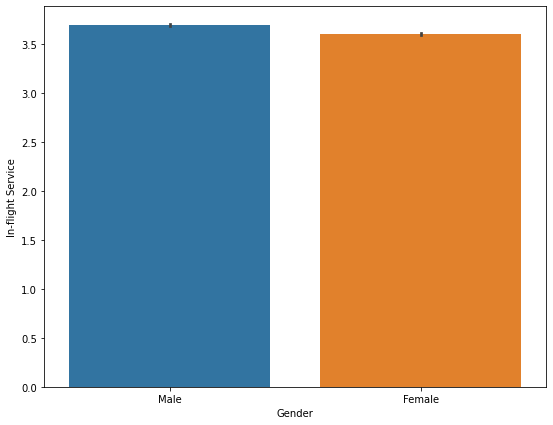

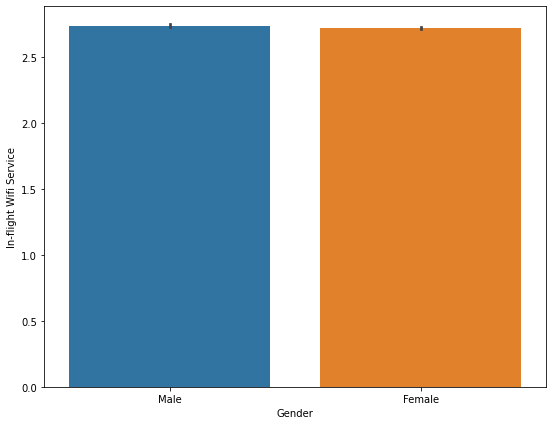

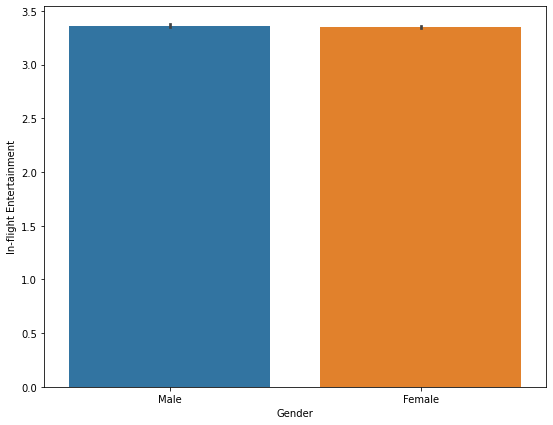

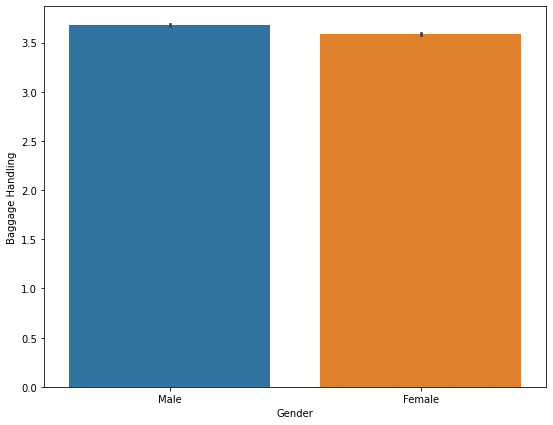

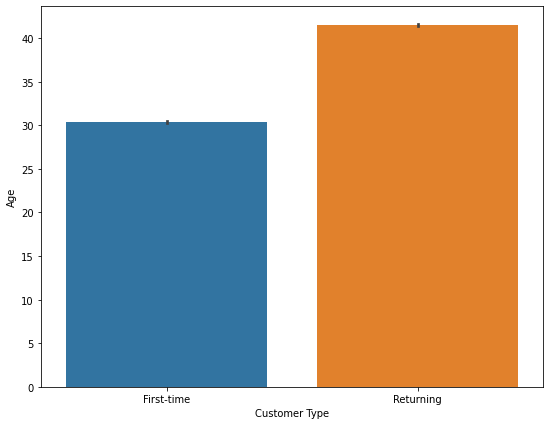

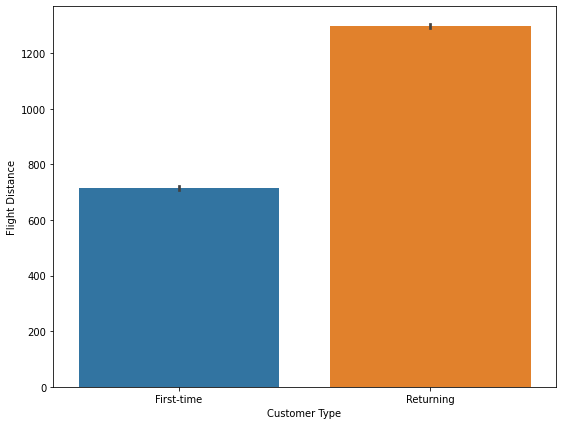

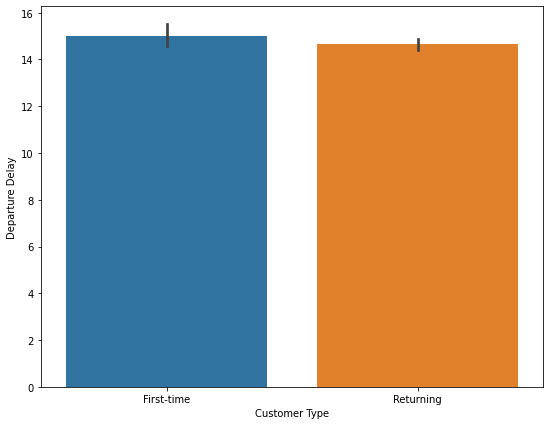

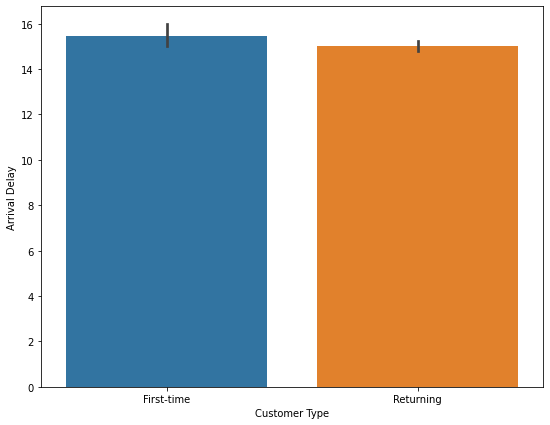

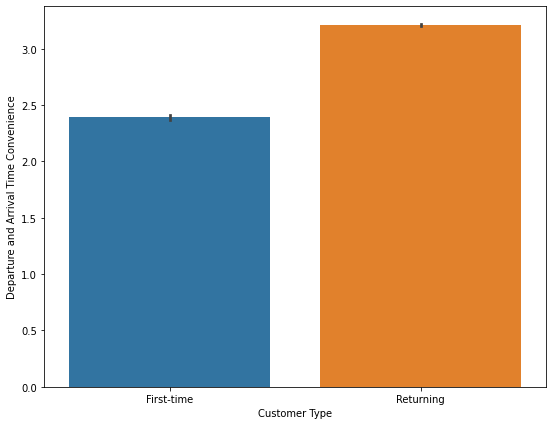

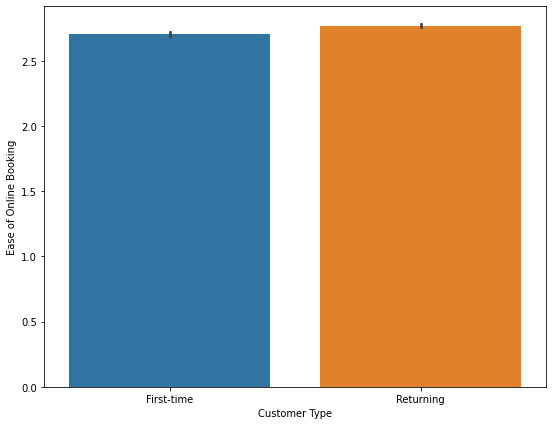

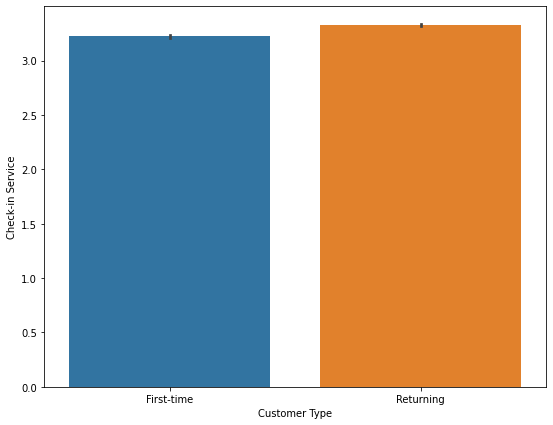

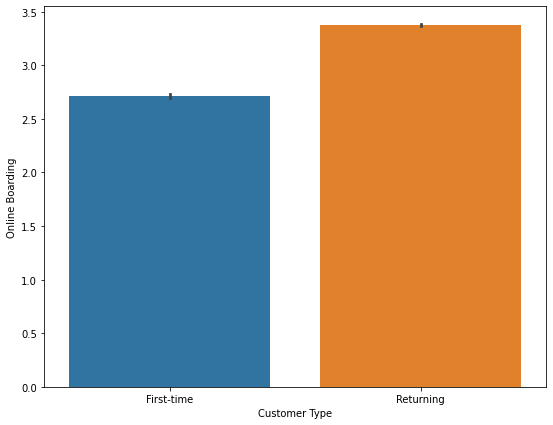

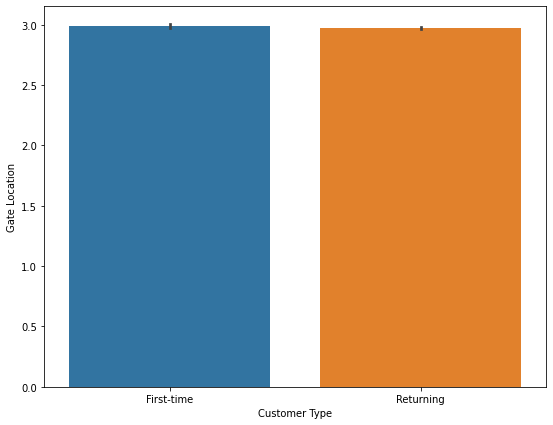

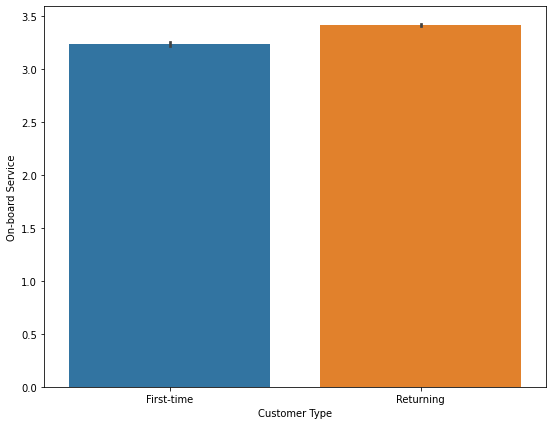

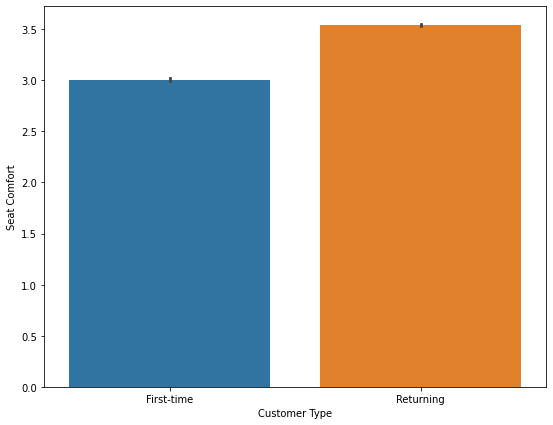

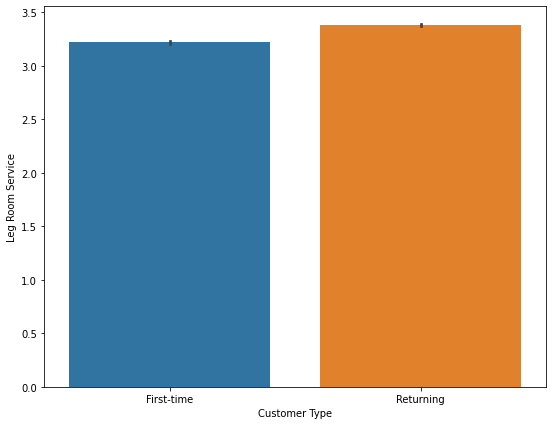

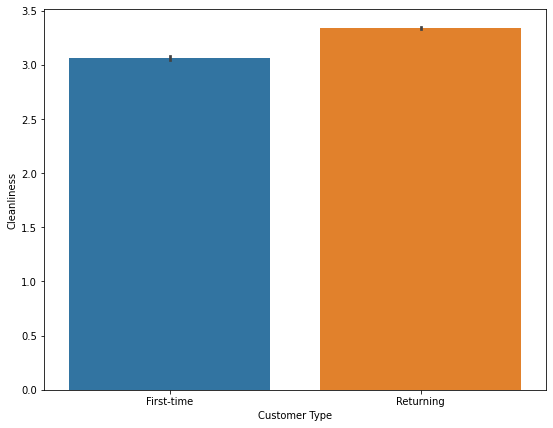

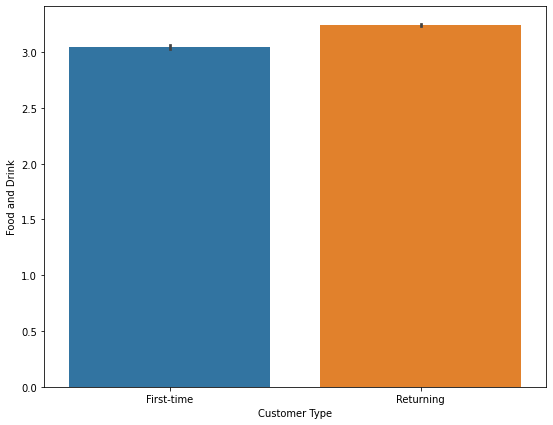

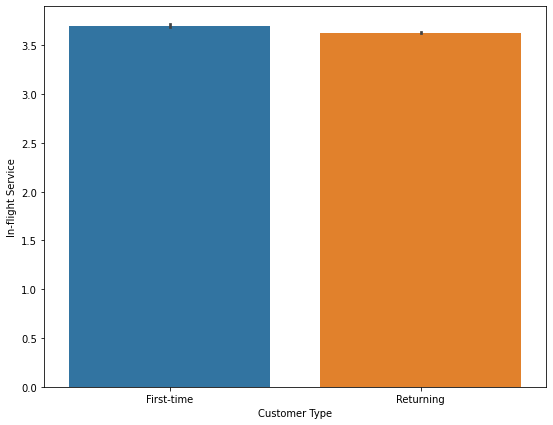

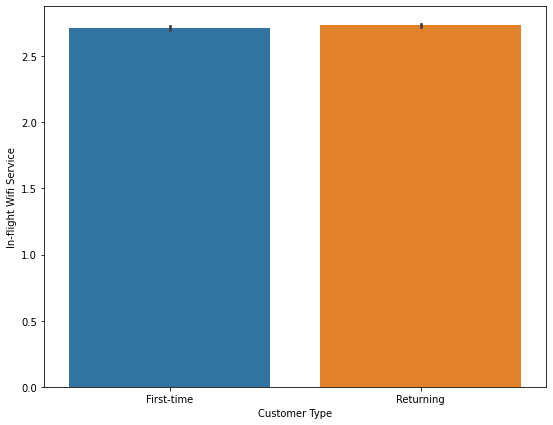

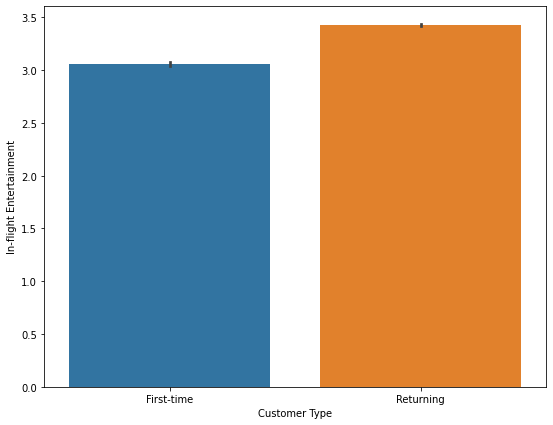

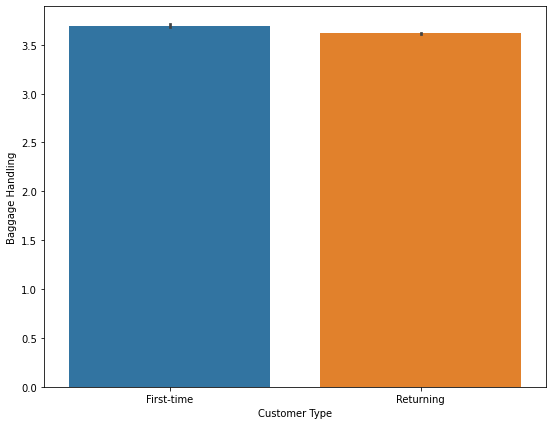

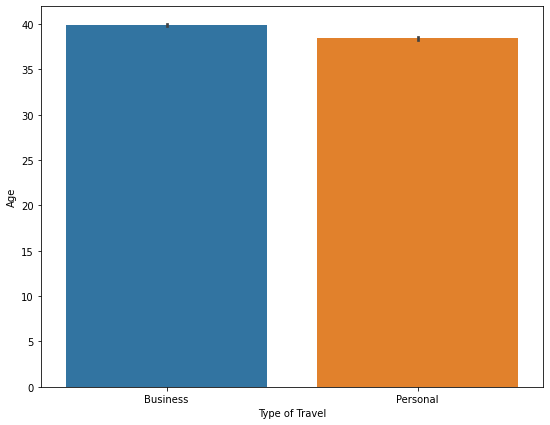

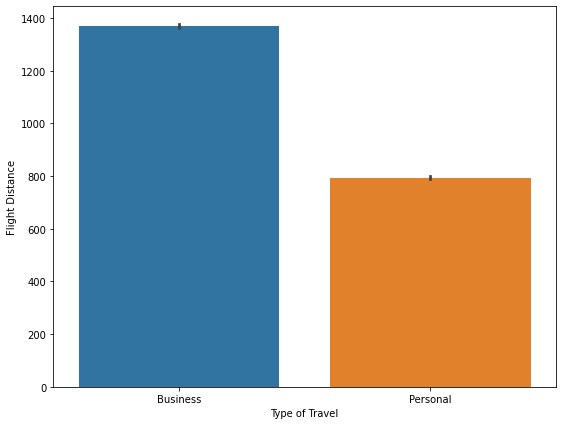

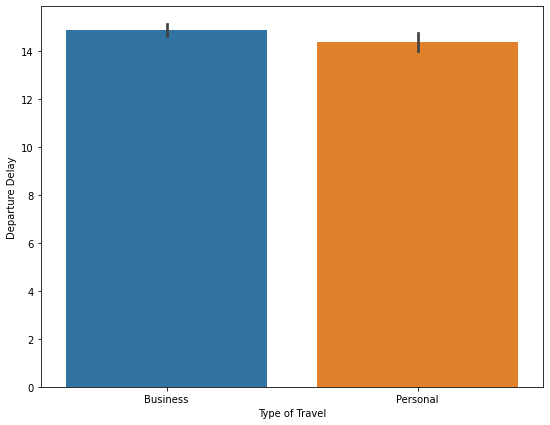

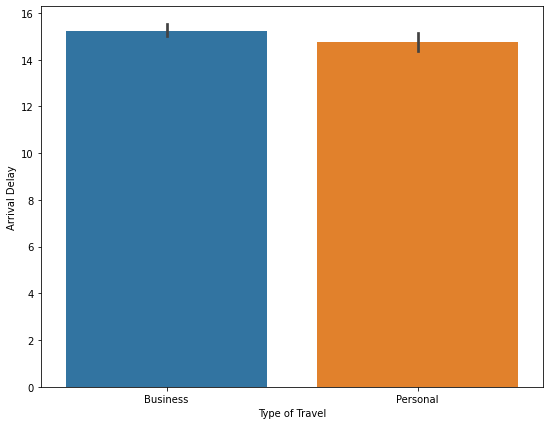

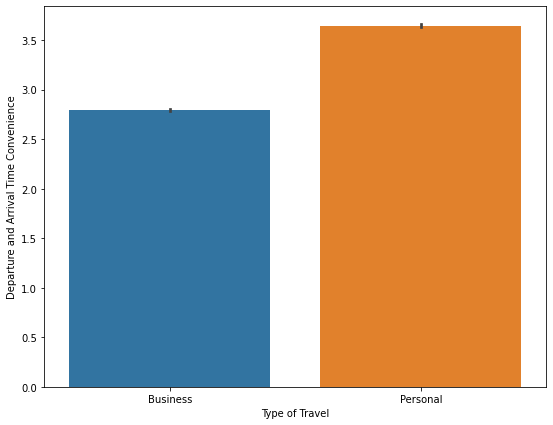

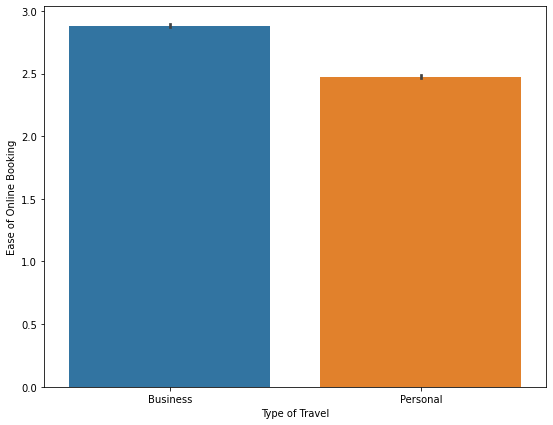

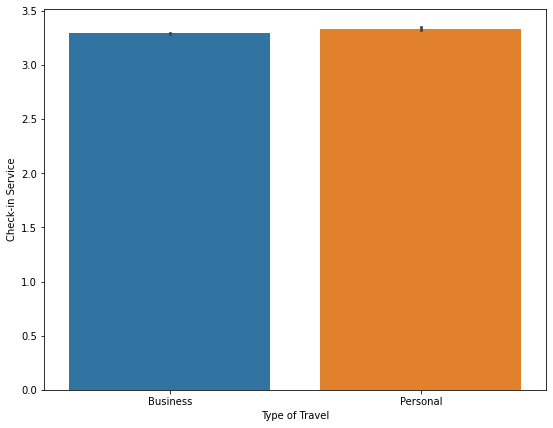

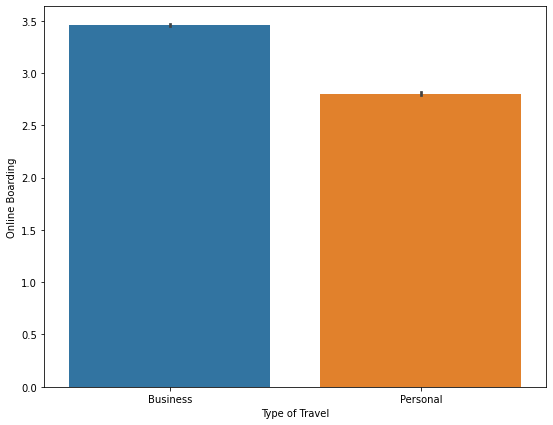

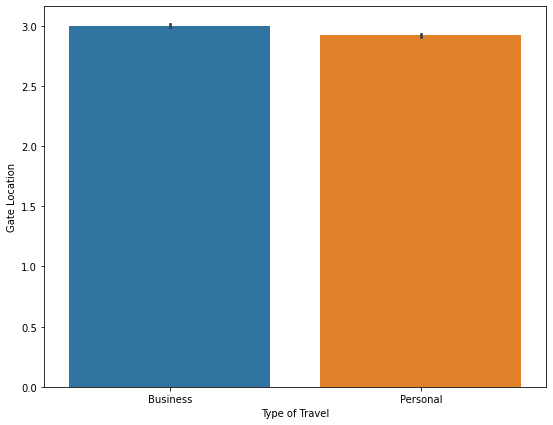

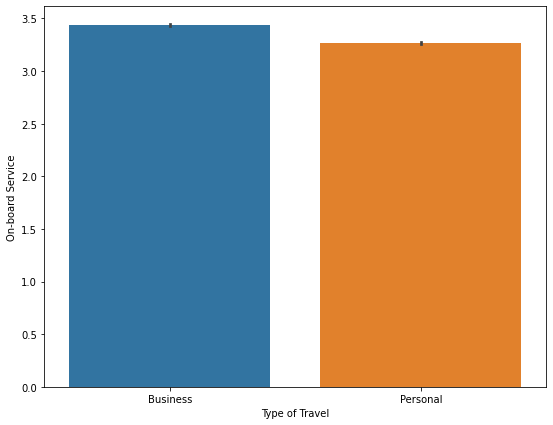

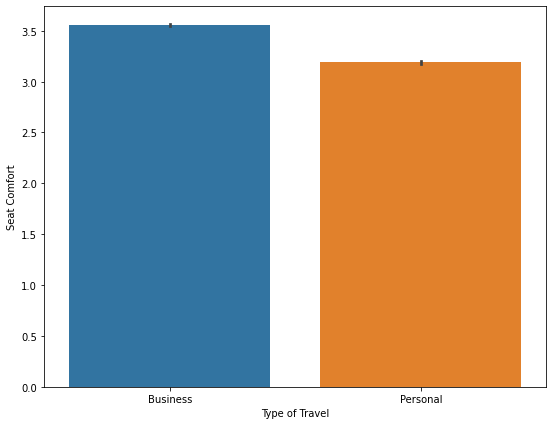

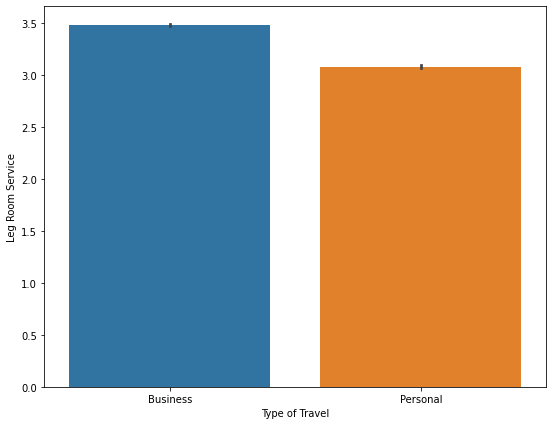

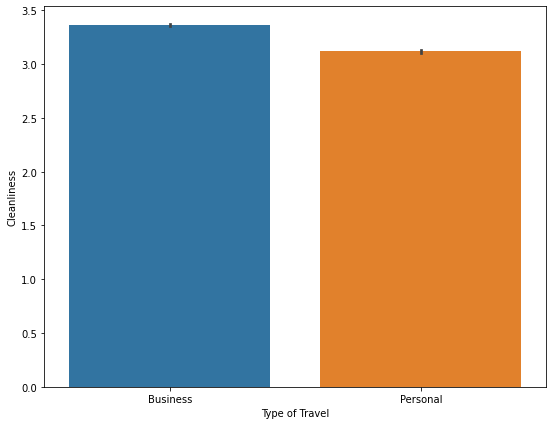

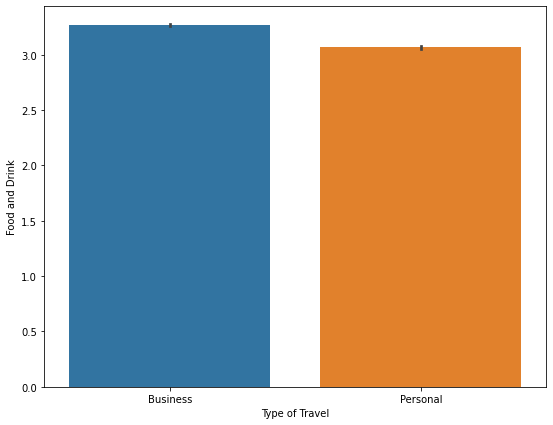

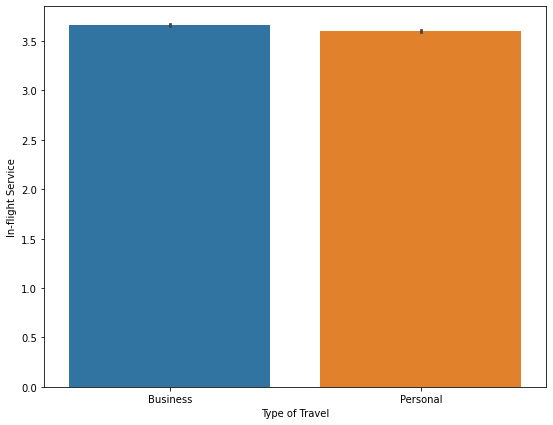

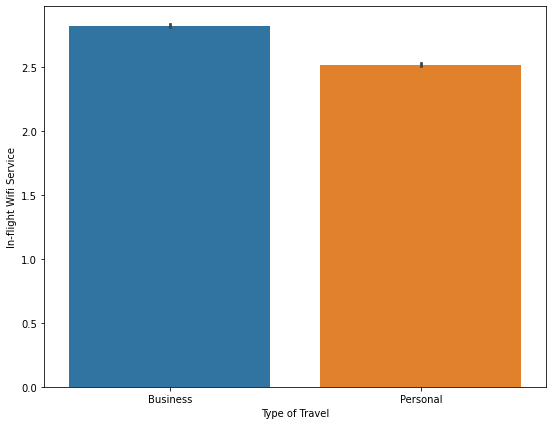

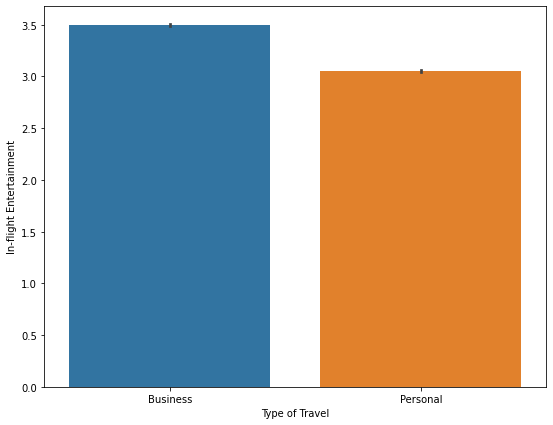

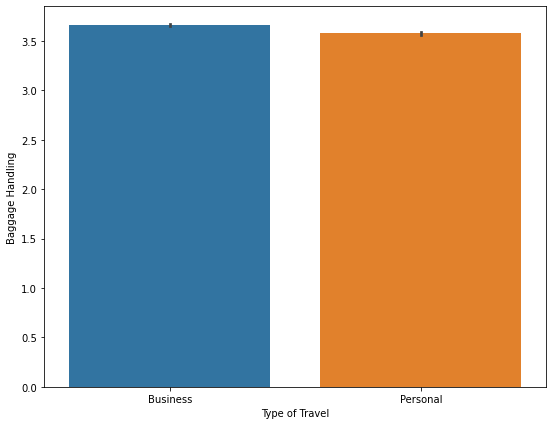

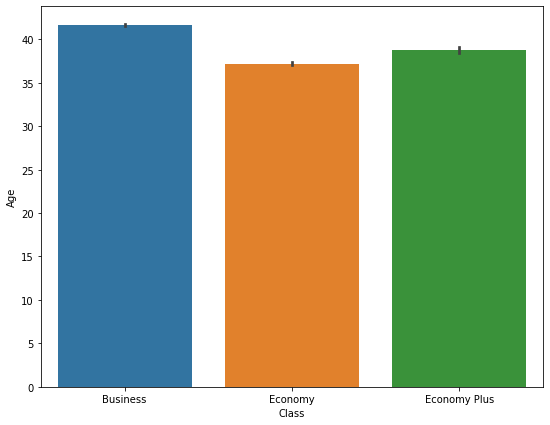

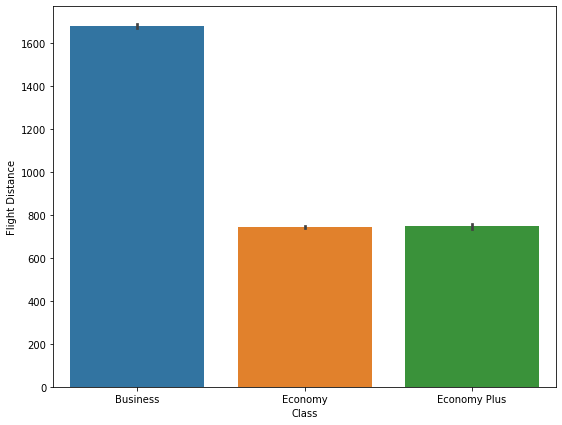

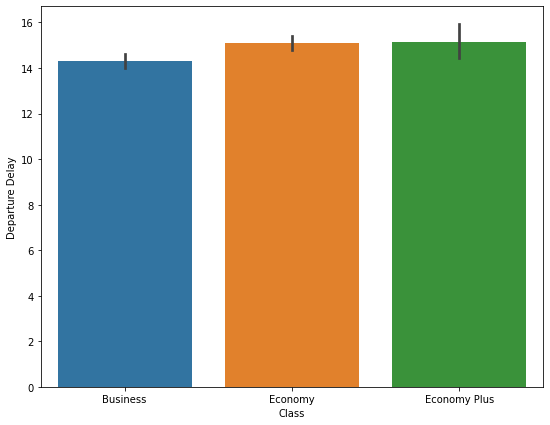

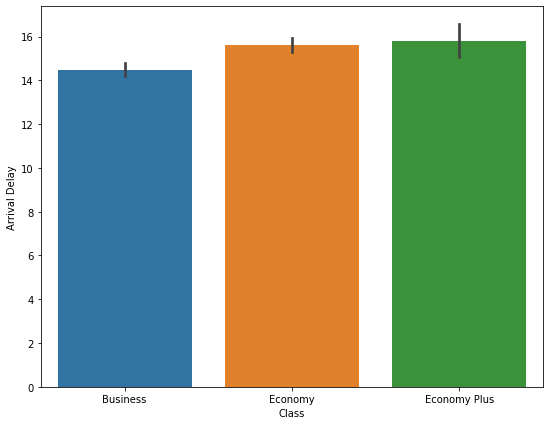

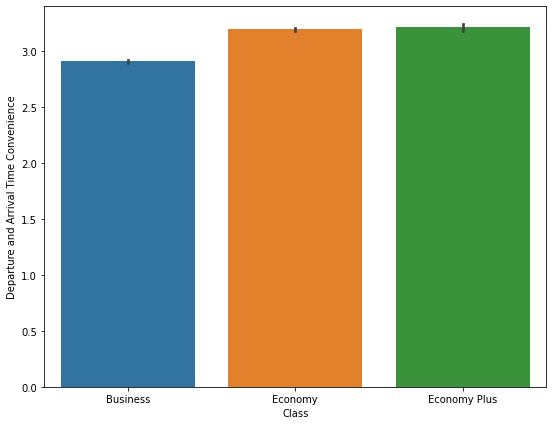

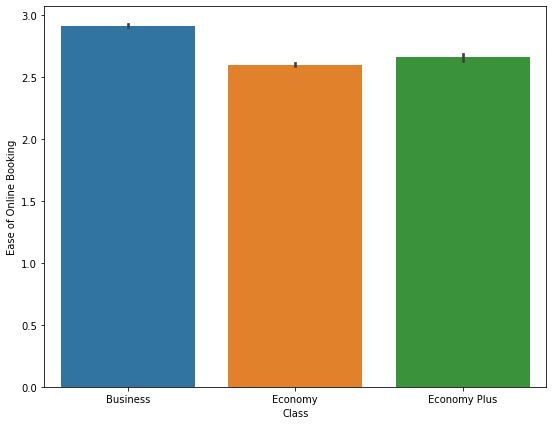

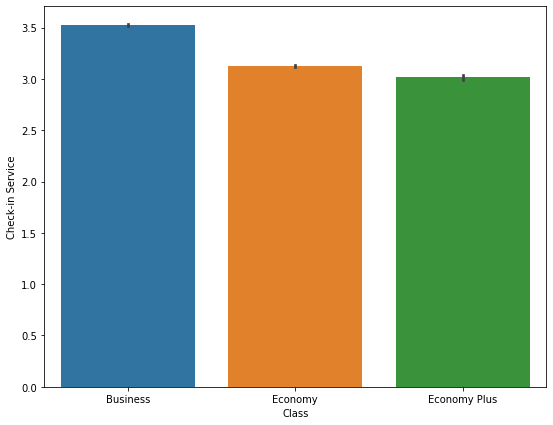

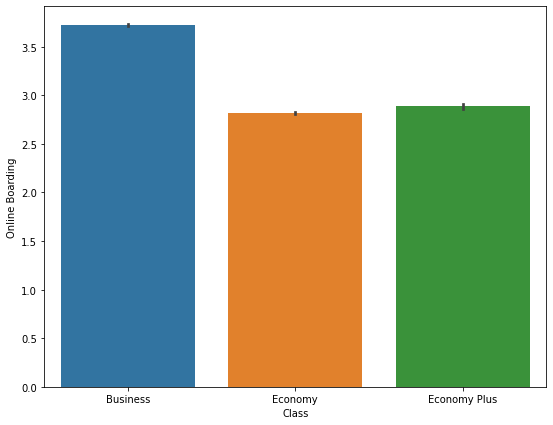

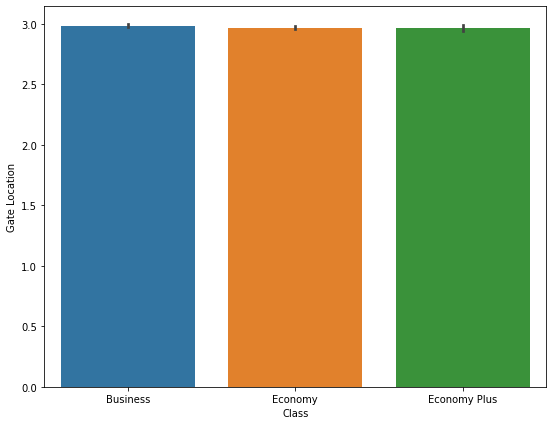

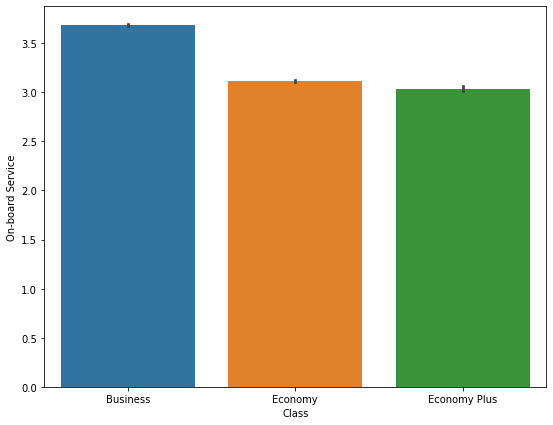

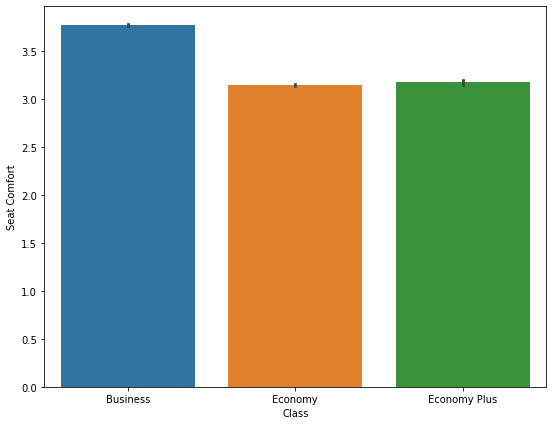

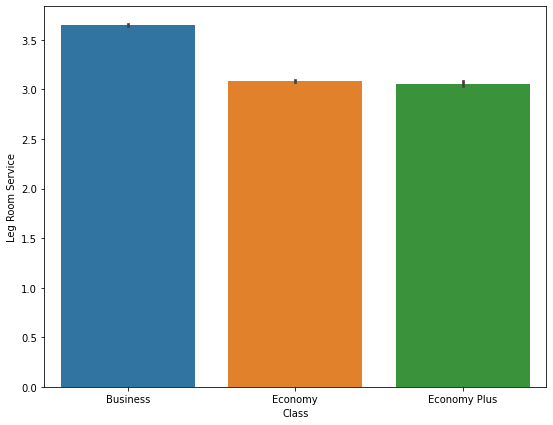

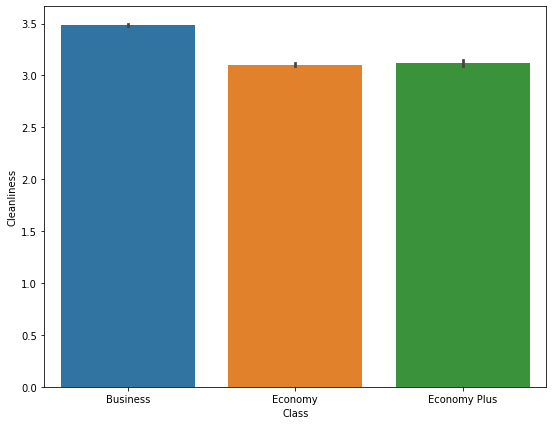

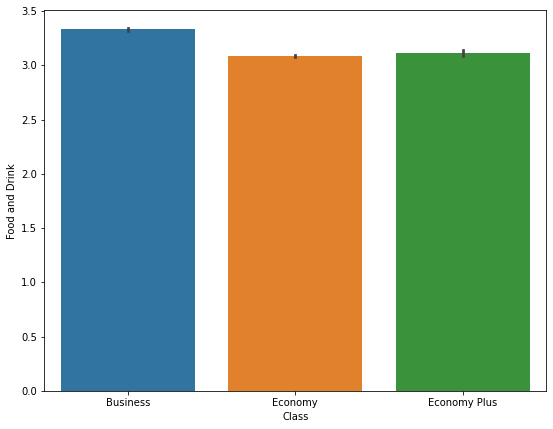

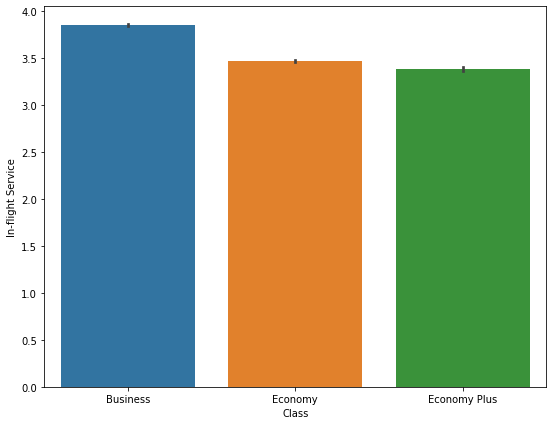

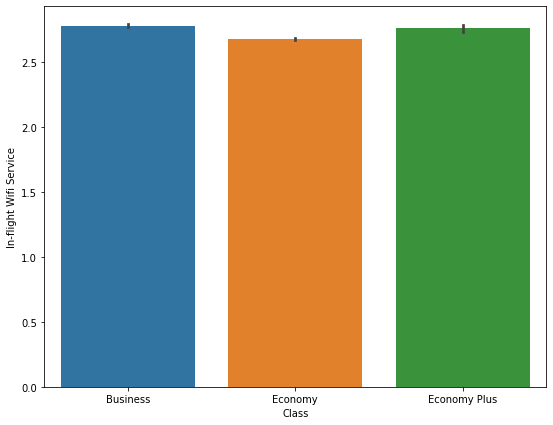

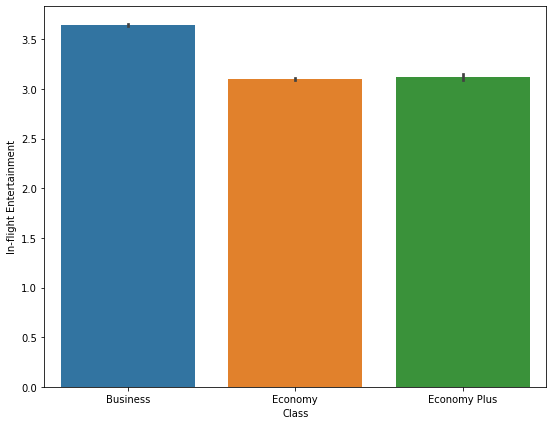

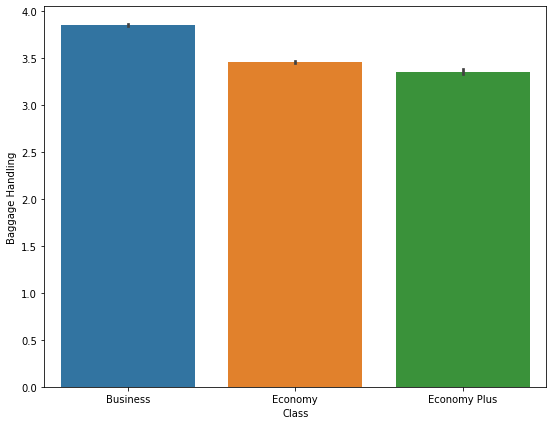

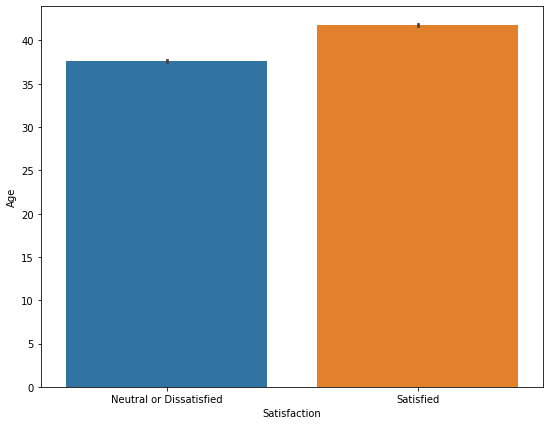

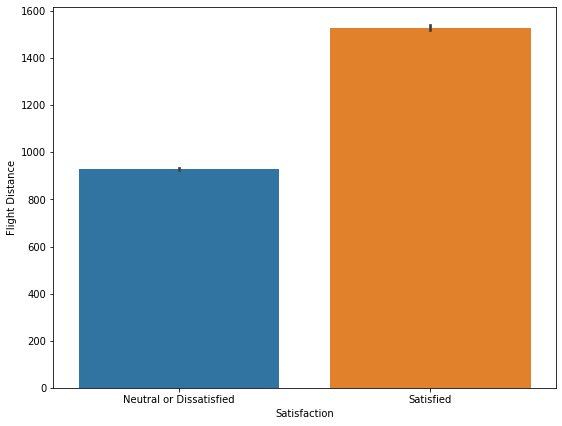

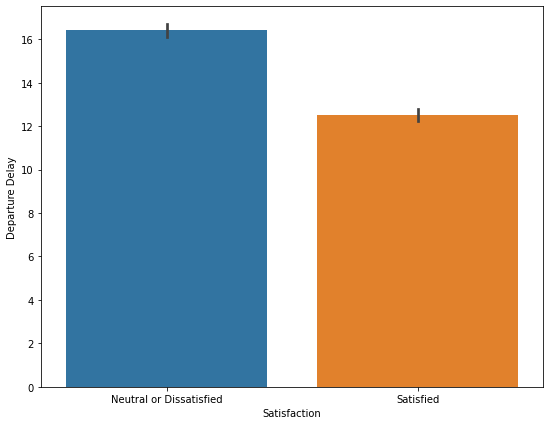

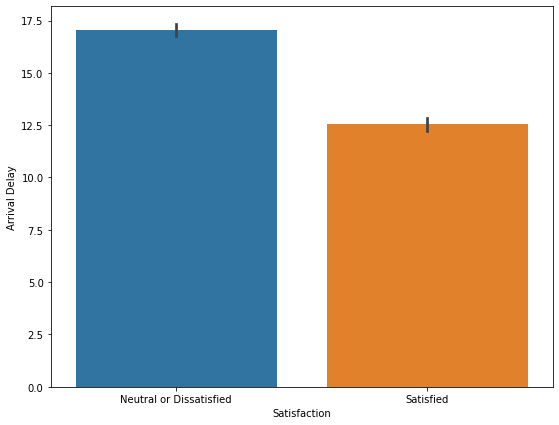

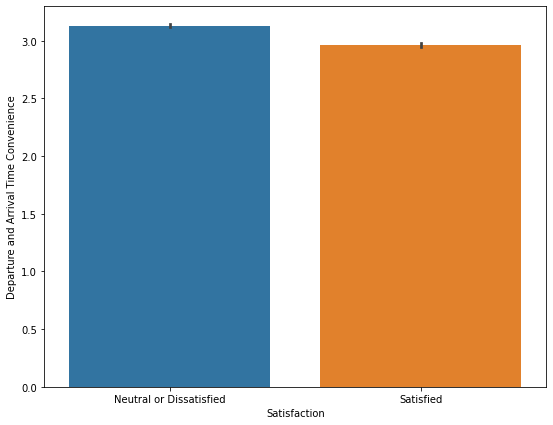

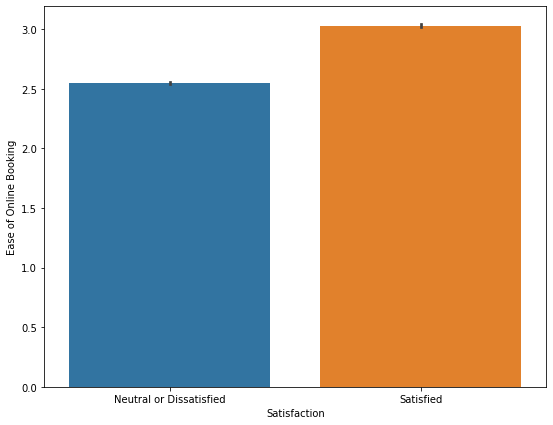

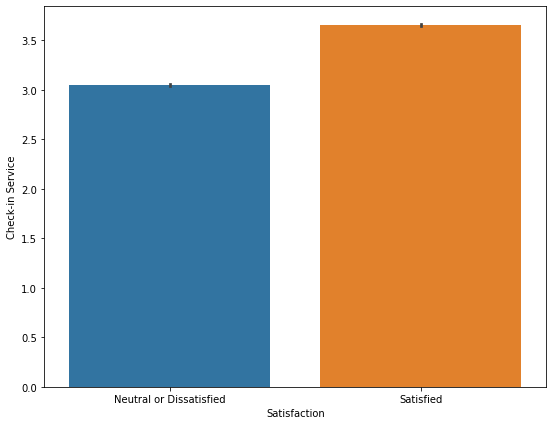

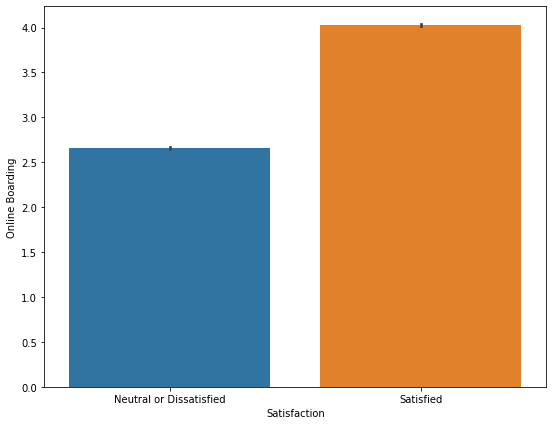

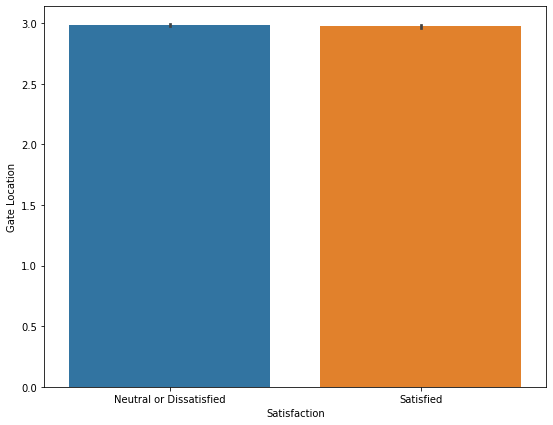

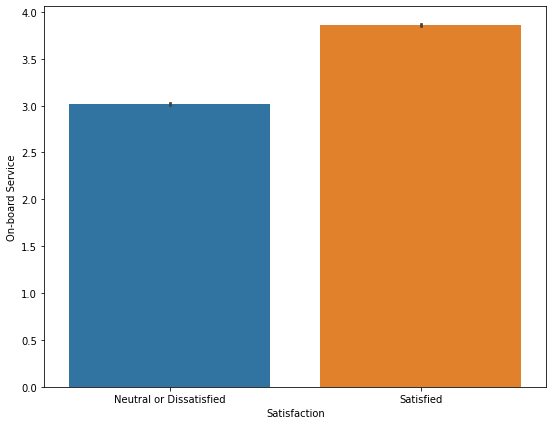

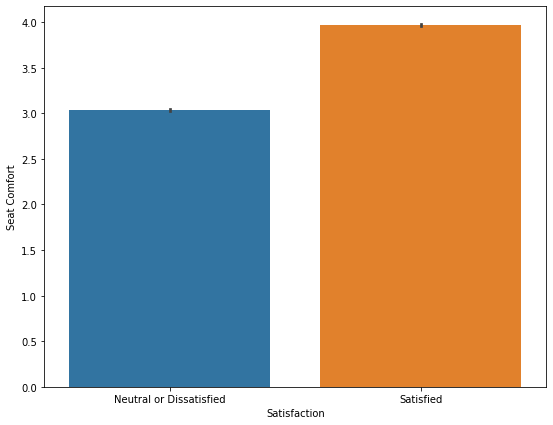

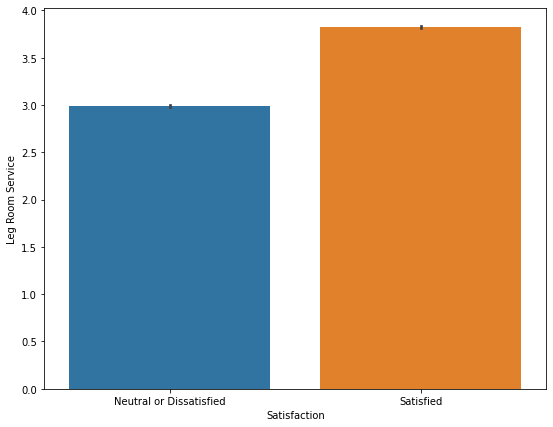

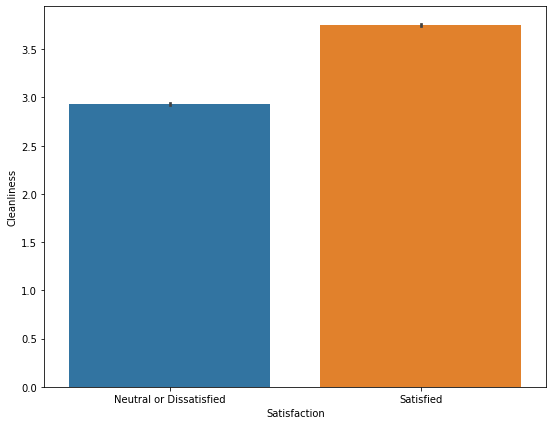

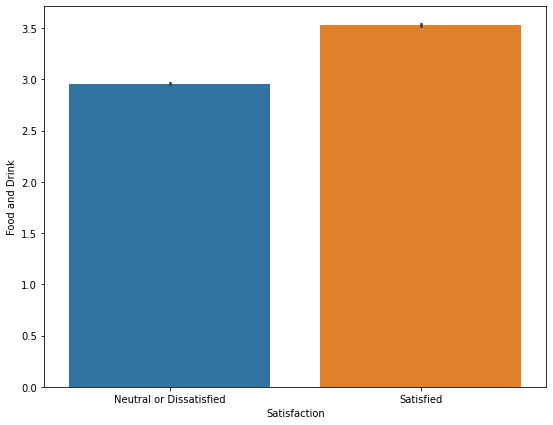

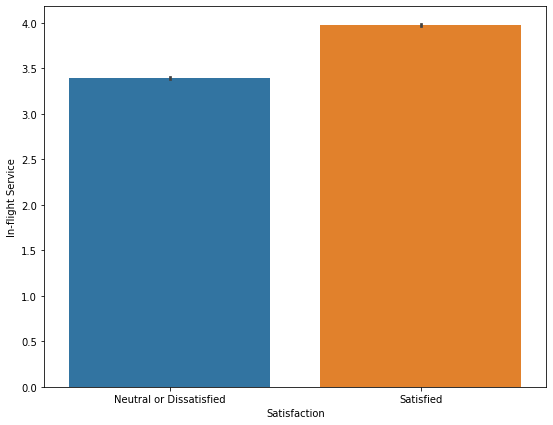

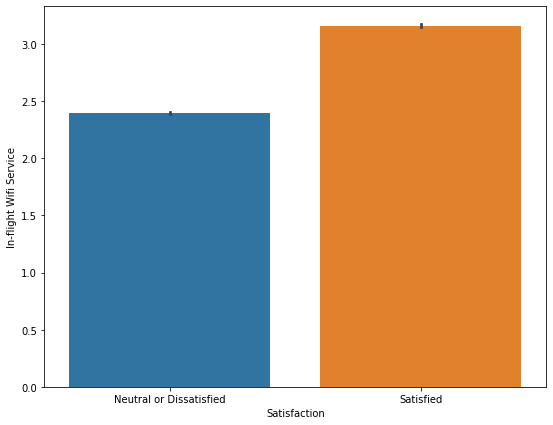

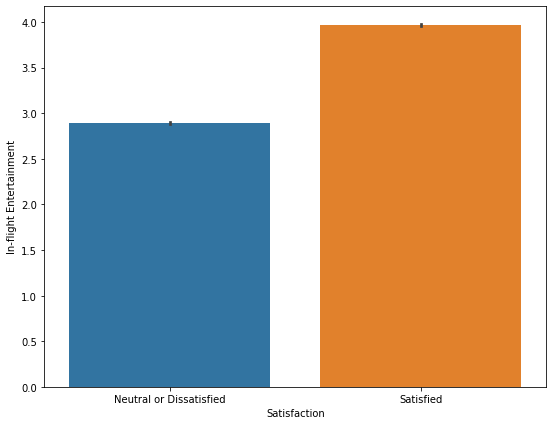

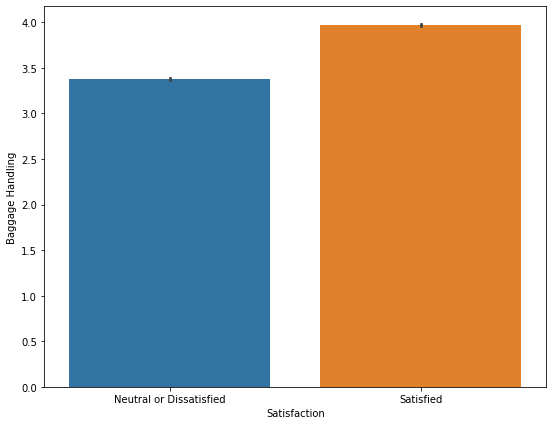

In [270]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize=(9,7))
        sns.barplot(data=df,x=i,y=j)
        plt.show()

In [271]:
df.groupby('Satisfaction').mean(numeric_only=True)

Age  Flight Distance  Departure Delay  \
Satisfaction                                                           
Neutral or Dissatisfied  37.650997       929.715420        16.406837   
Satisfied                41.741015      1529.539165        12.509782   

                         Arrival Delay  \
Satisfaction                             
Neutral or Dissatisfied      17.055992   
Satisfied                    12.533859   

                         Departure and Arrival Time Convenience  \
Satisfaction                                                      
Neutral or Dissatisfied                                3.130221   
Satisfied                                              2.963068   

                         Ease of Online Booking  Check-in Service  \
Satisfaction                                                        
Neutral or Dissatisfied                2.549393          3.042967   
Satisfied                              3.026955          3.649004   

                         Online Boarding  Gate Location  On-board Service  \
Satisfaction                                                                
Neutral or Dissatisfied         2.658621       2.980055          3.019537   
Satisfied                       4.025856       2.972850          3.856171   

                         Seat Comfort  Leg Room Service  Cleanliness  \
Satisfaction                                                           
Neutral or Dissatisfied      3.037998          2.990443     2.932800   
Satisfied                    3.966417          3.820054     3.746509   

                         Food and Drink  In-flight Service  \
Satisfaction                                                 
Neutral or Dissatisfied        2.958422           3.389601   
Satisfied                      3.525448           3.970990   

                         In-flight Wifi Service  In-flight Entertainment  \
Satisfaction                                                               
Neutral or Dissatisfied                2.398423                 2.892433   
Satisfied                              3.158609                 3.964202   

                         Baggage Handling  
Satisfaction                               
Neutral or Dissatisfied          3.374912  
Satisfied                        3.966914

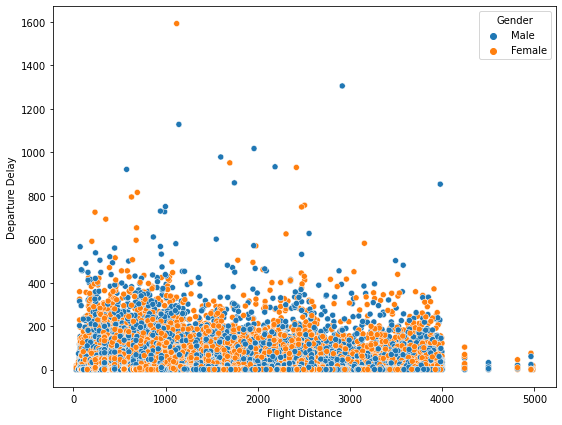

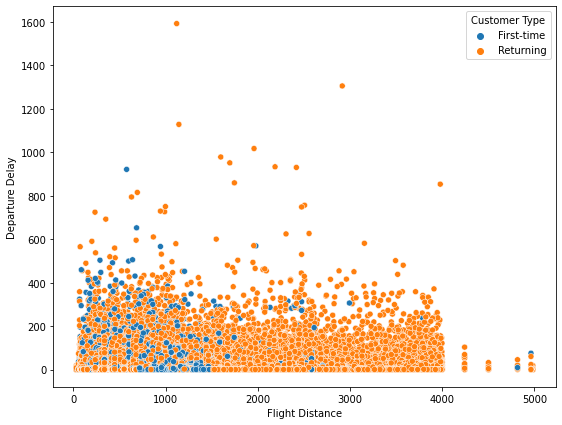

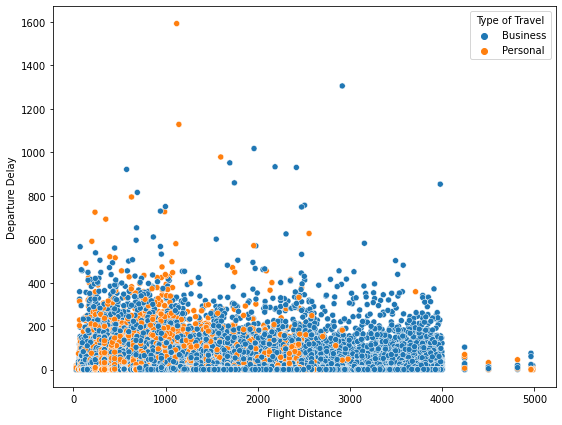

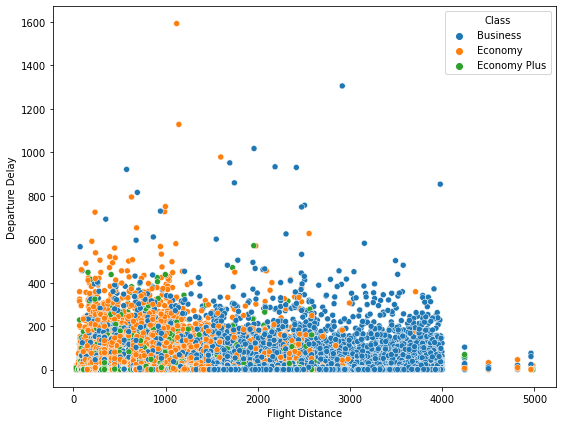

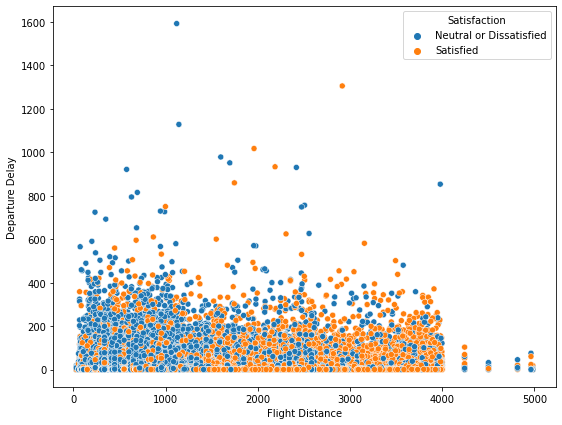

In [272]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='Flight Distance',y='Departure Delay',hue=i)
    plt.show()

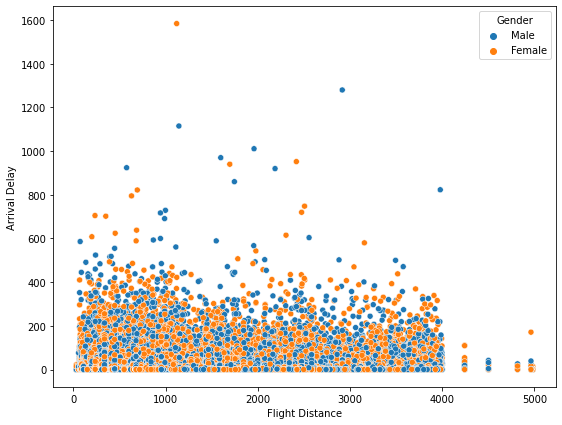

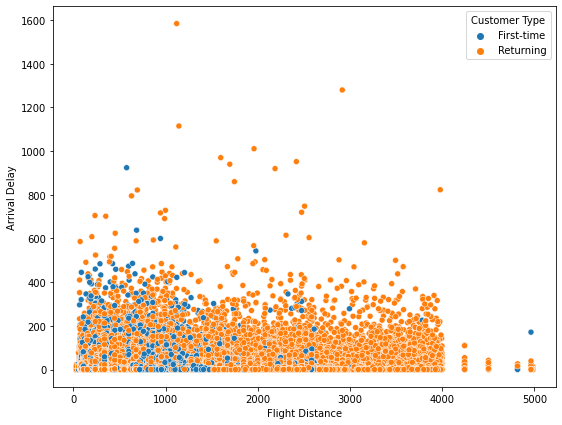

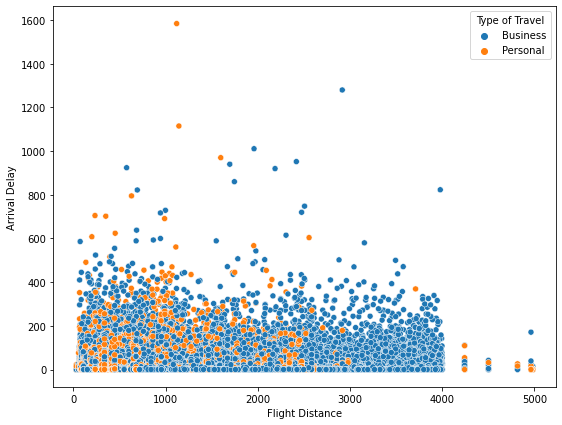

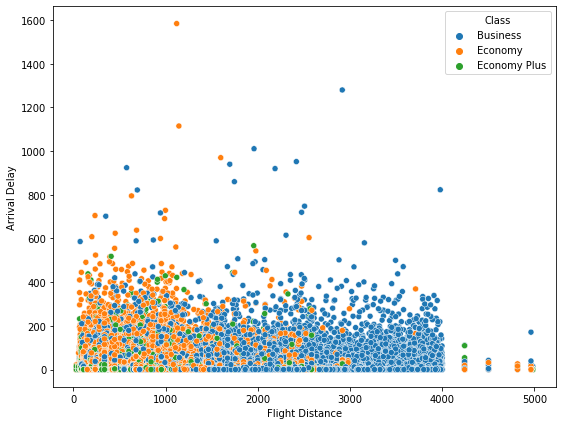

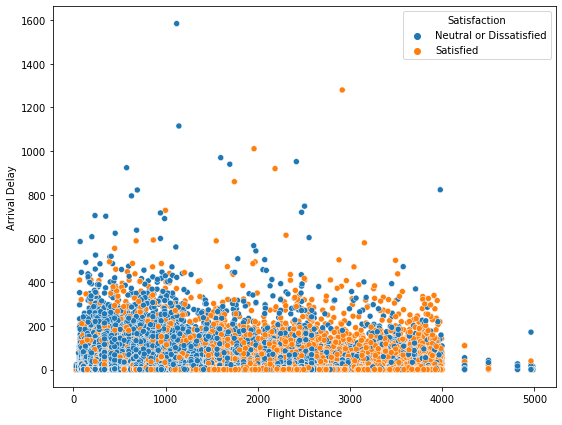

In [273]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='Flight Distance',y='Arrival Delay',hue=i)
    plt.show()

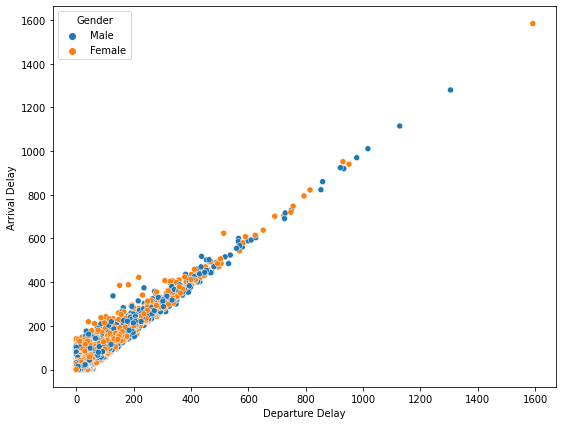

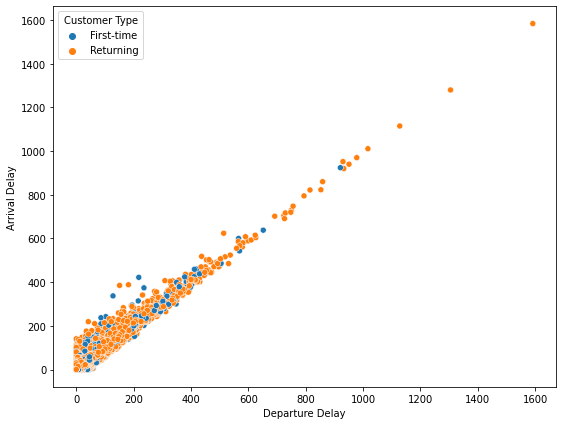

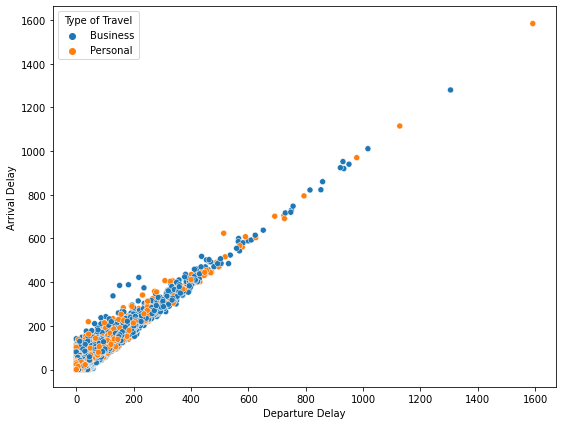

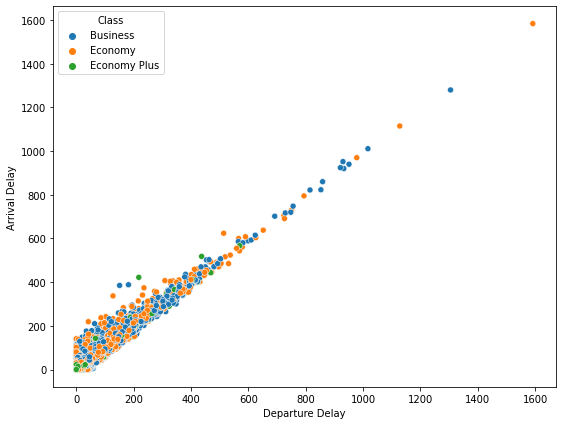

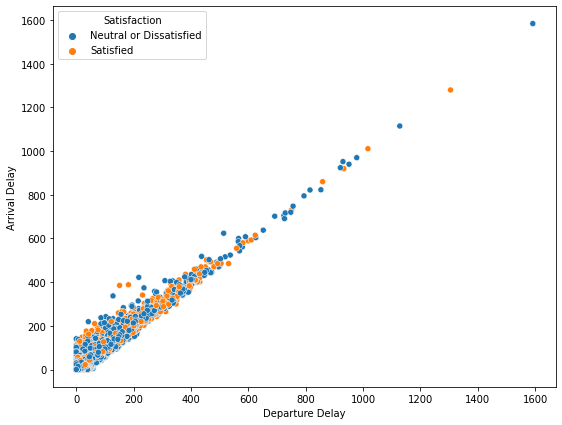

In [274]:
for i in categorical_columns:
    plt.figure(figsize=(9,7))
    sns.scatterplot(data=df,x='Departure Delay',y='Arrival Delay',hue=i)
    plt.show()

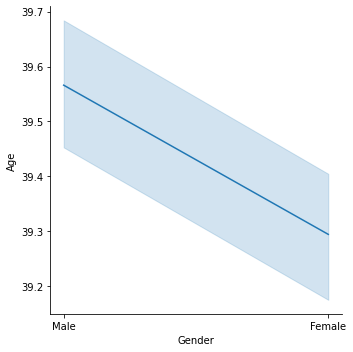

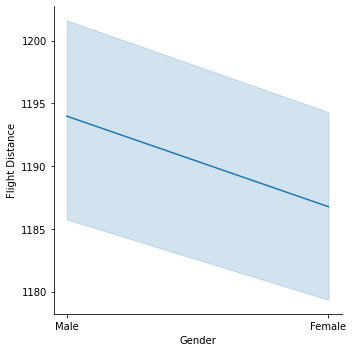

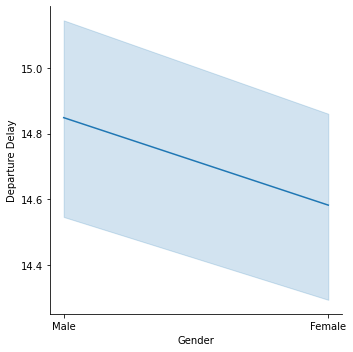

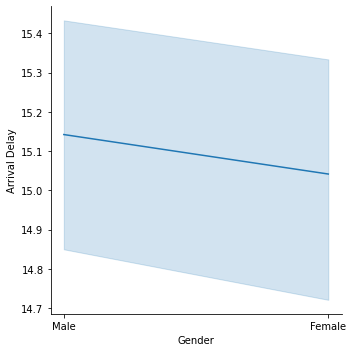

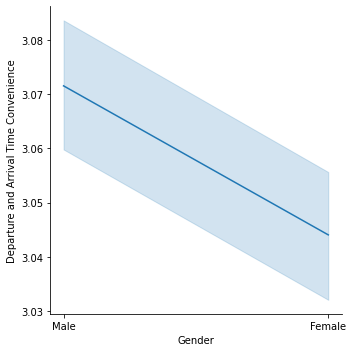

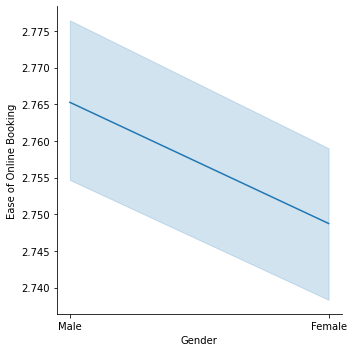

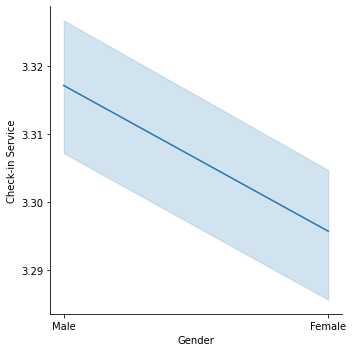

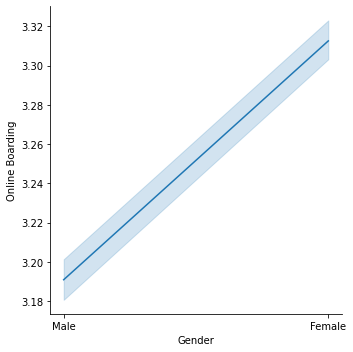

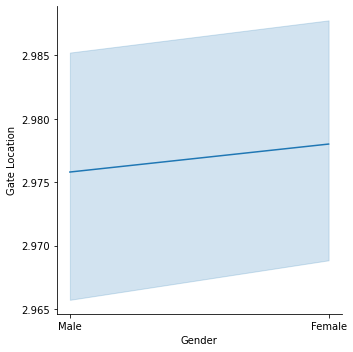

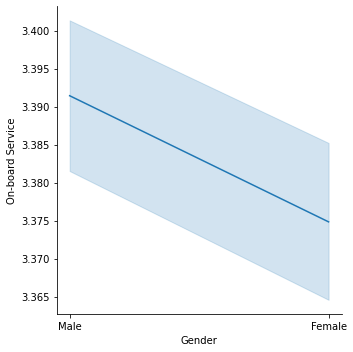

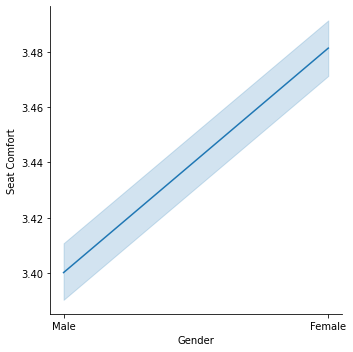

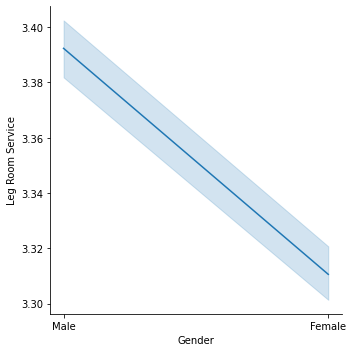

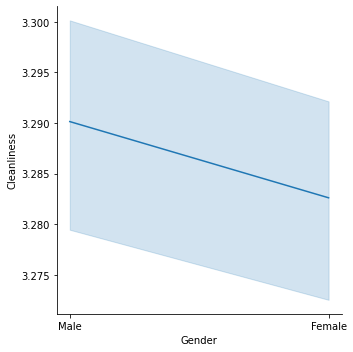

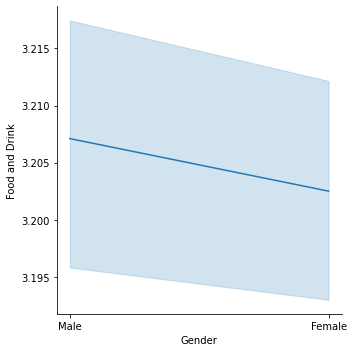

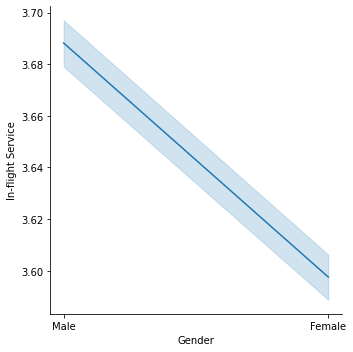

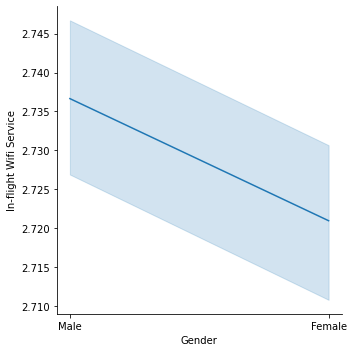

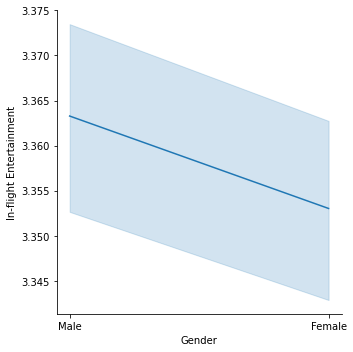

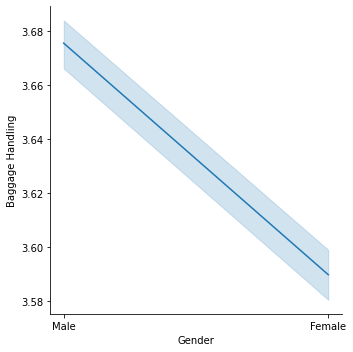

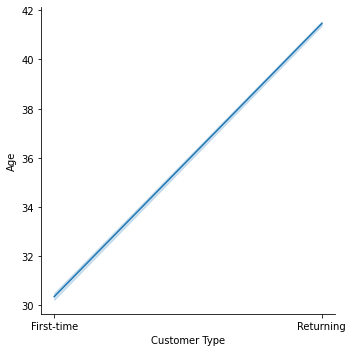

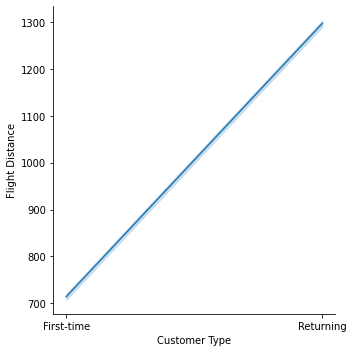

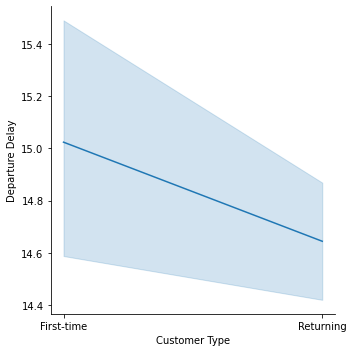

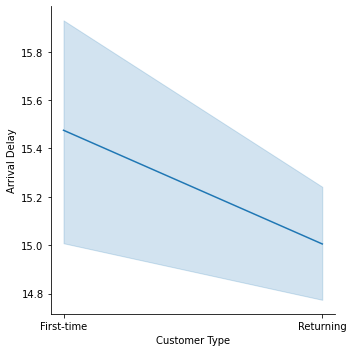

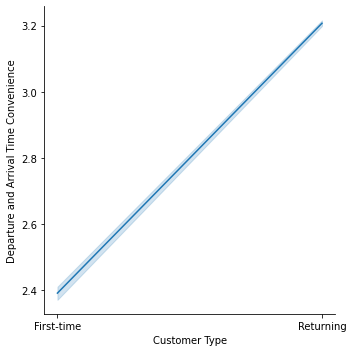

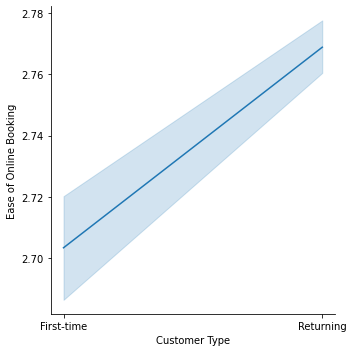

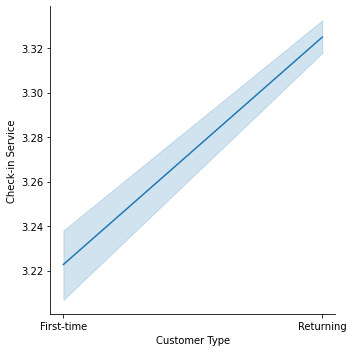

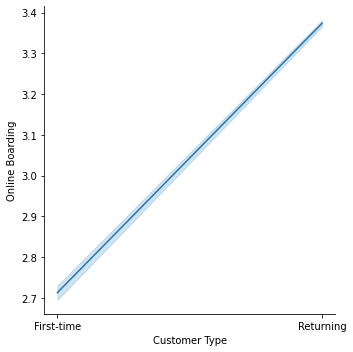

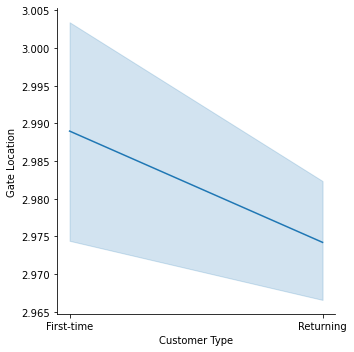

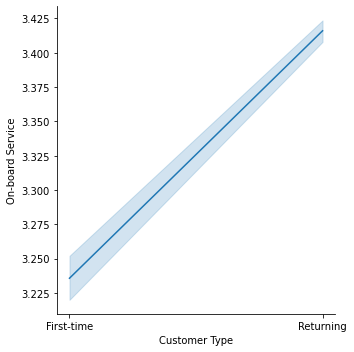

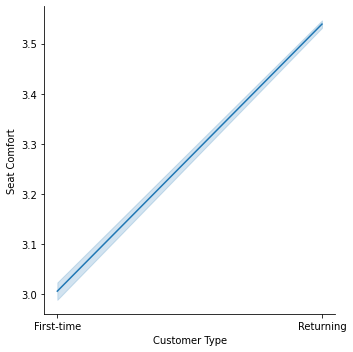

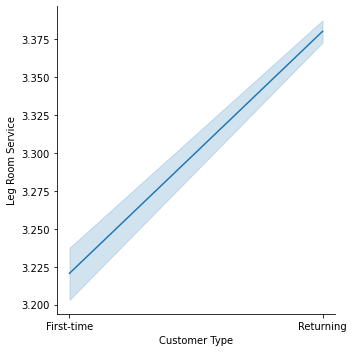

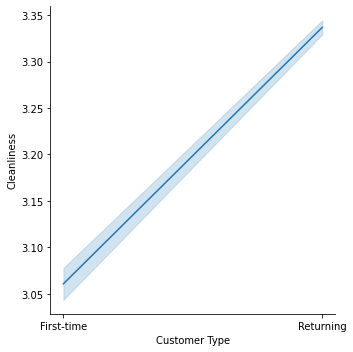

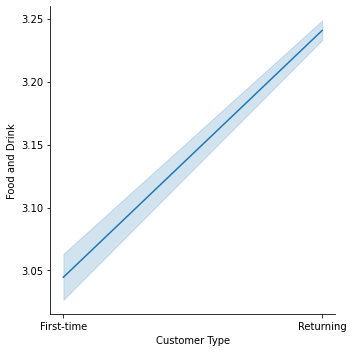

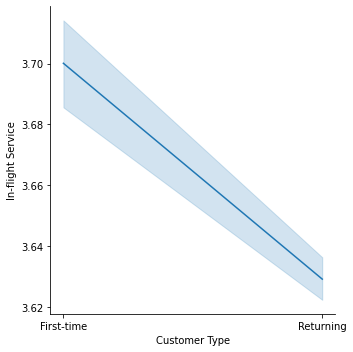

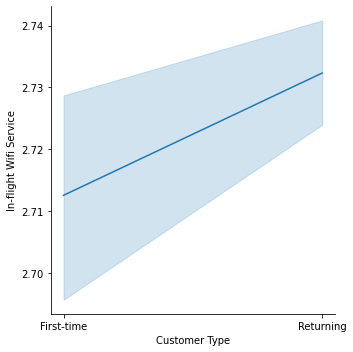

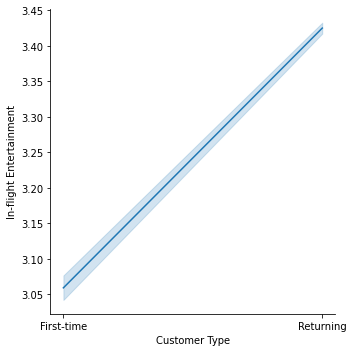

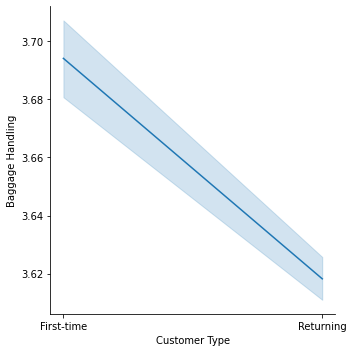

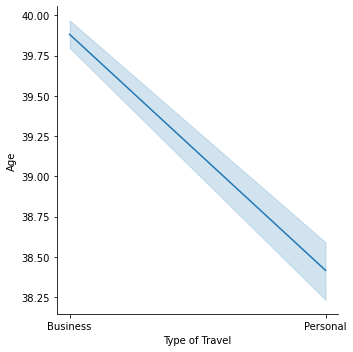

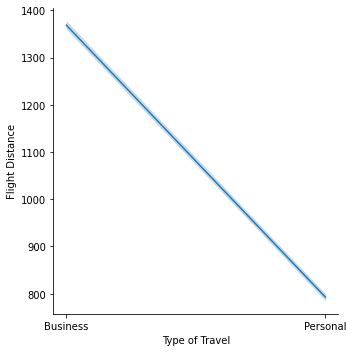

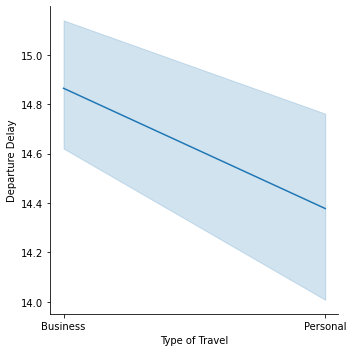

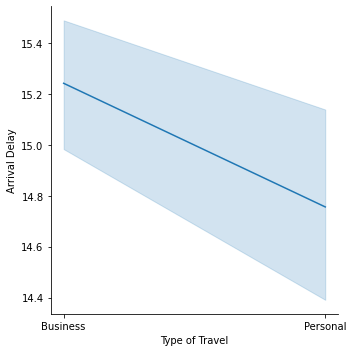

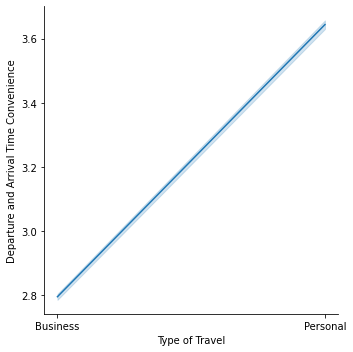

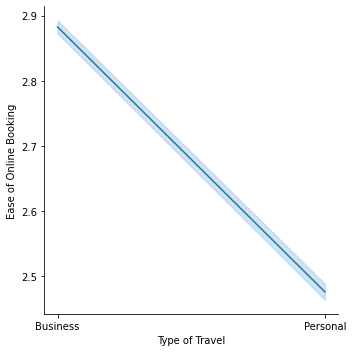

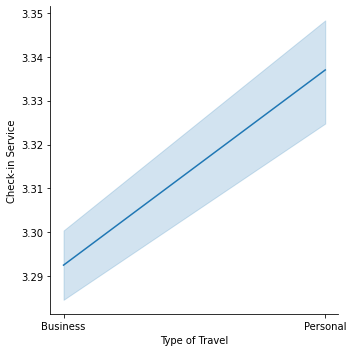

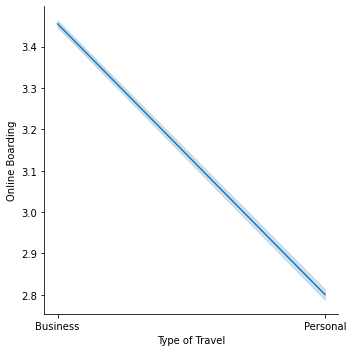

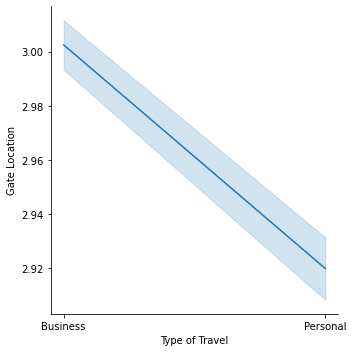

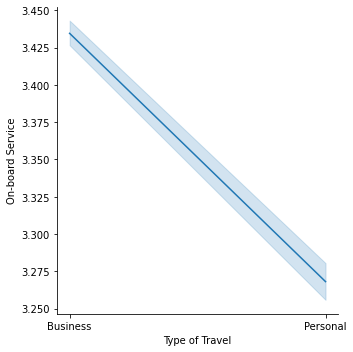

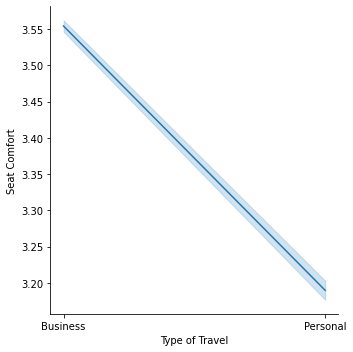

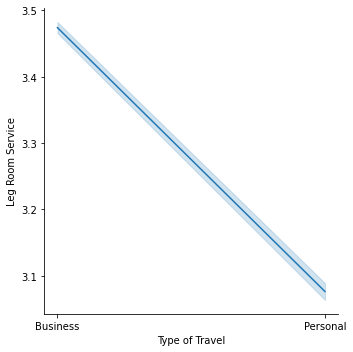

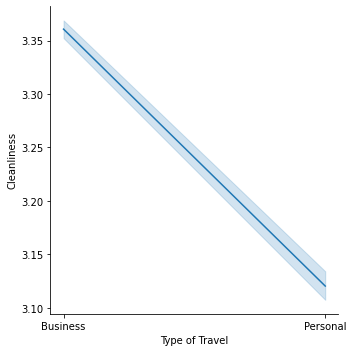

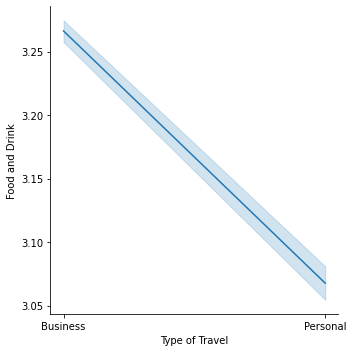

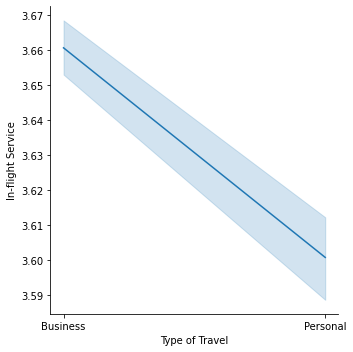

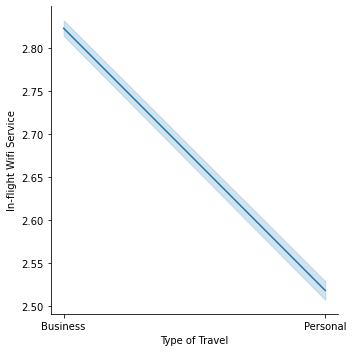

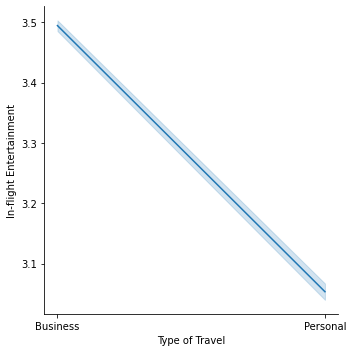

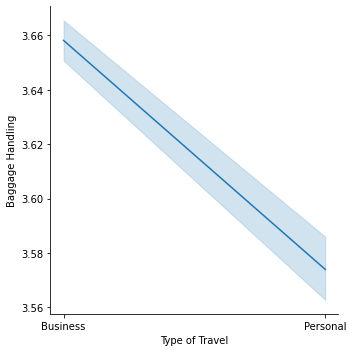

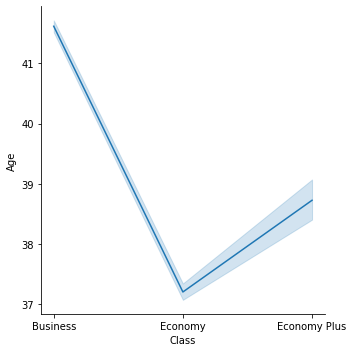

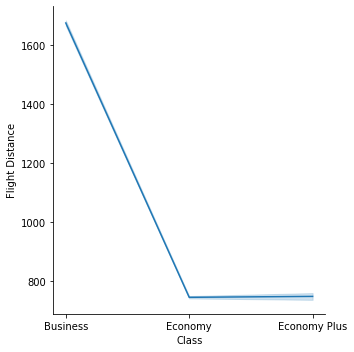

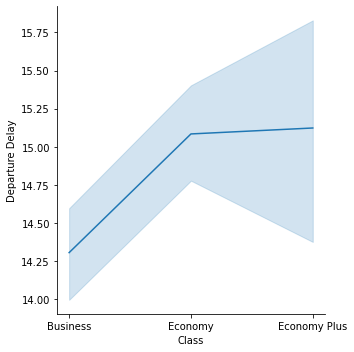

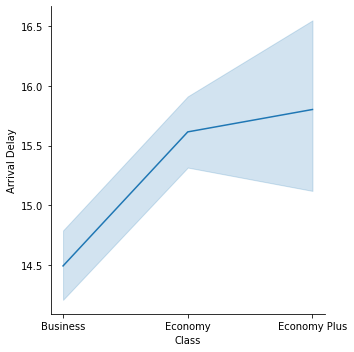

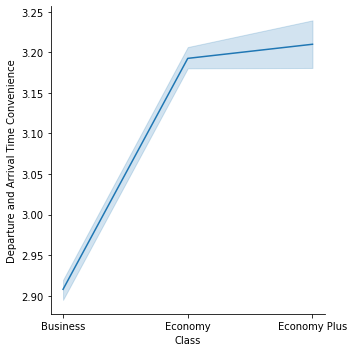

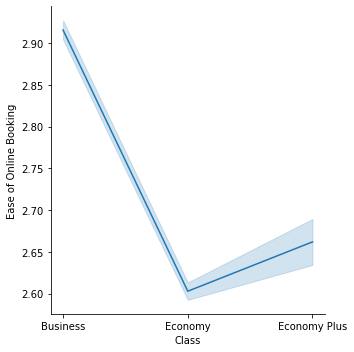

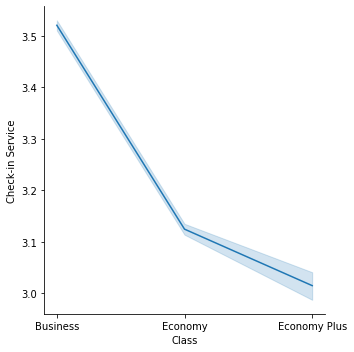

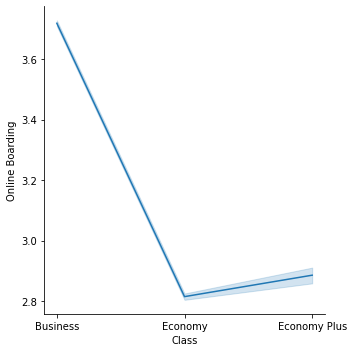

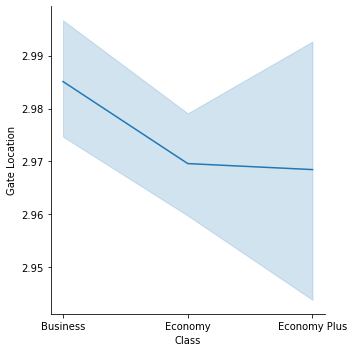

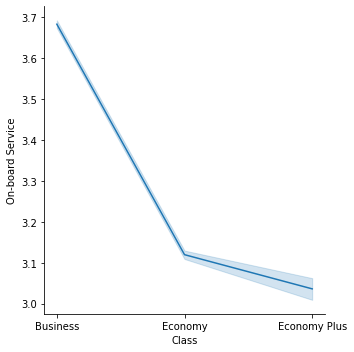

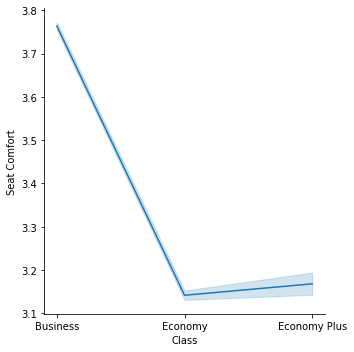

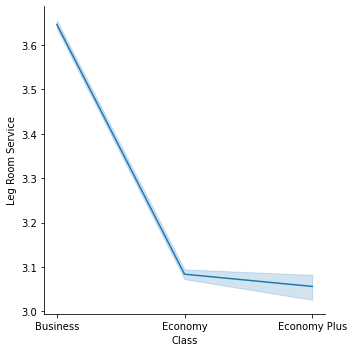

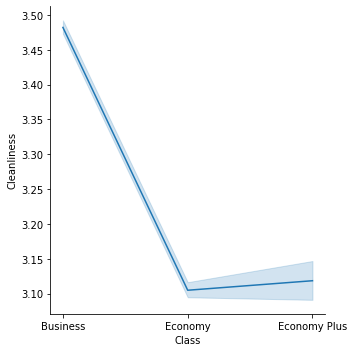

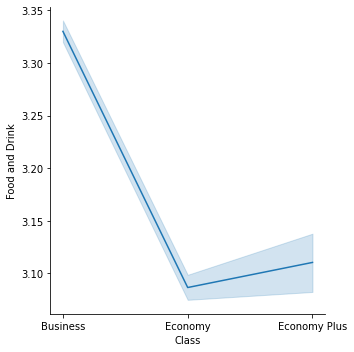

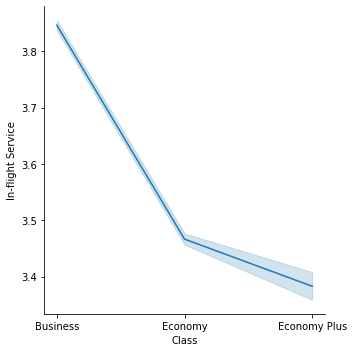

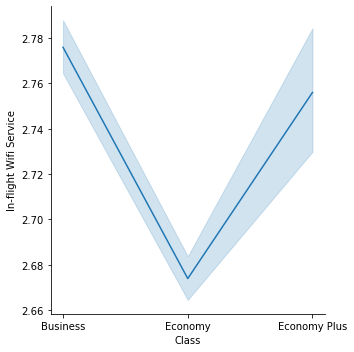

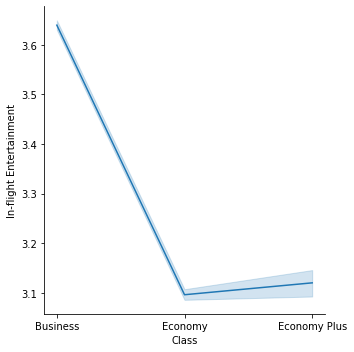

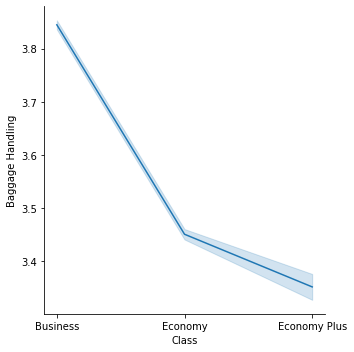

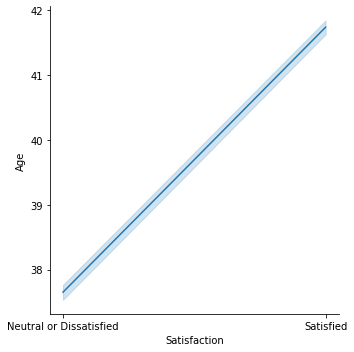

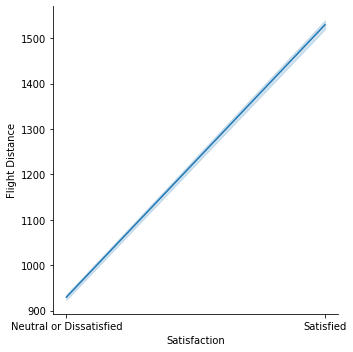

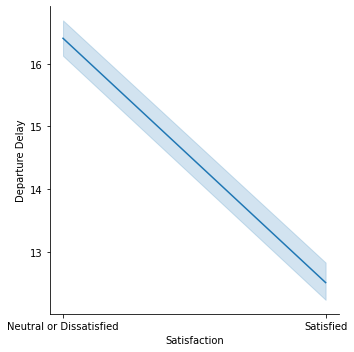

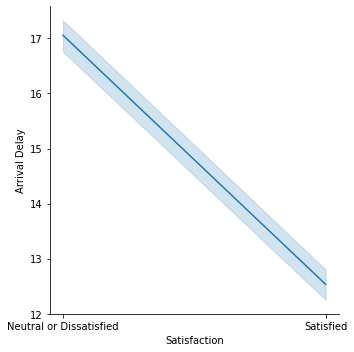

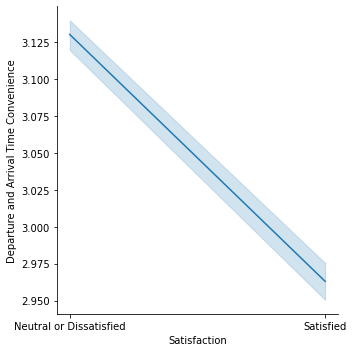

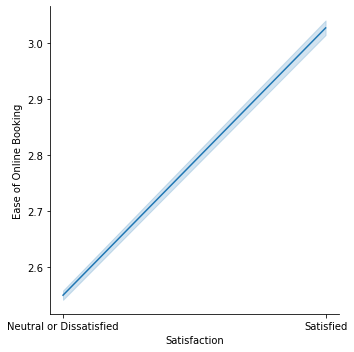

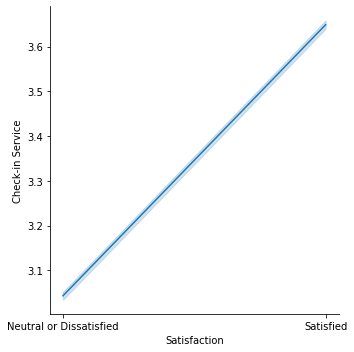

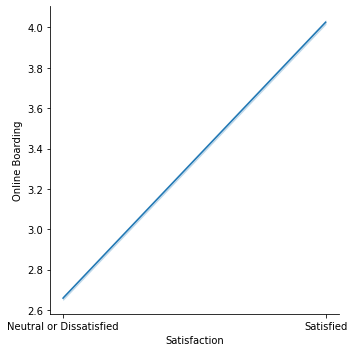

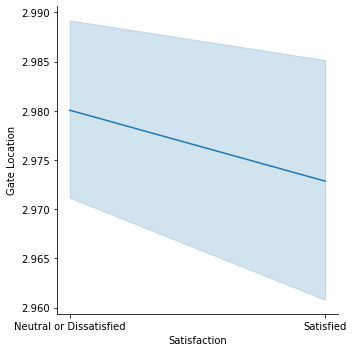

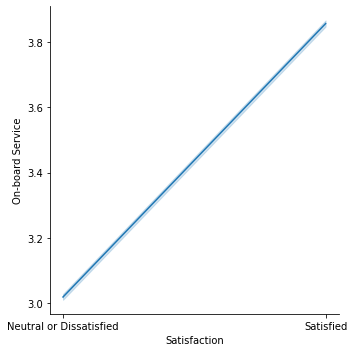

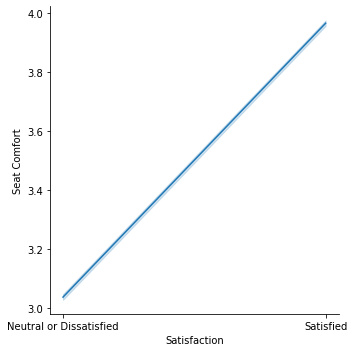

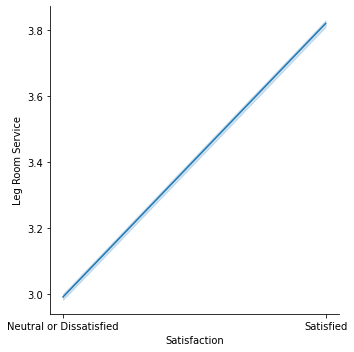

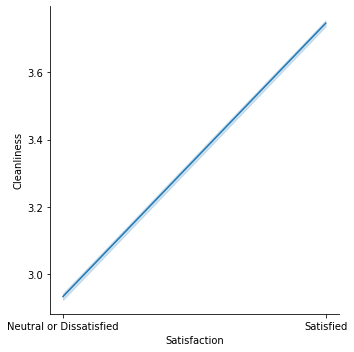

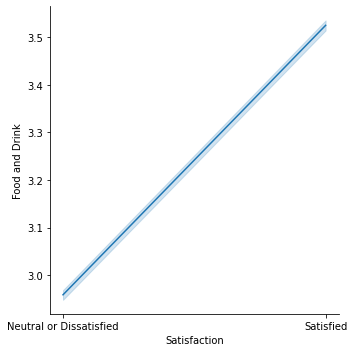

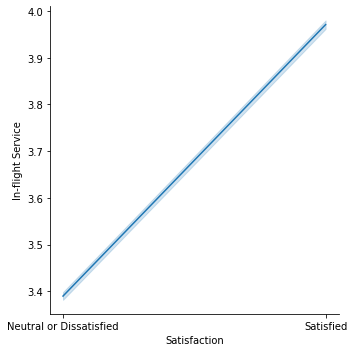

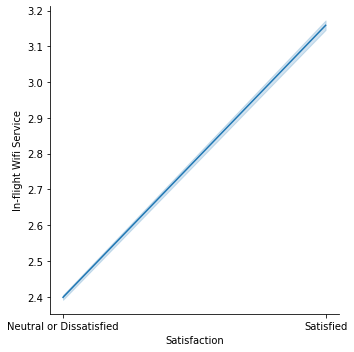

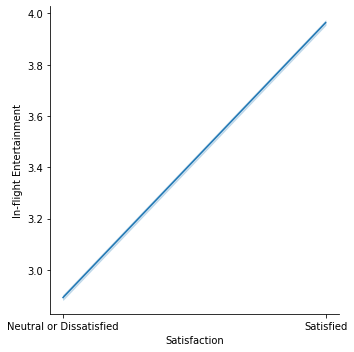

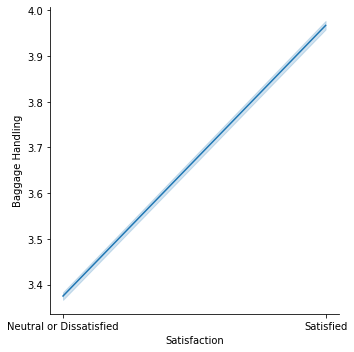

In [275]:
for i in categorical_columns:
    for j in numerical_columns:
        sns.relplot(data=df,x=i,y=j,kind='line')
        plt.show()

In [276]:
cols1=['Age','Flight Distance','Departure Delay','Arrival Delay']

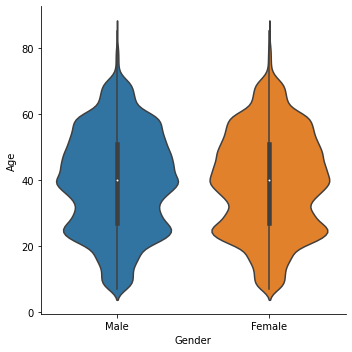

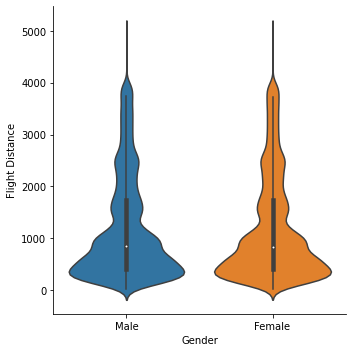

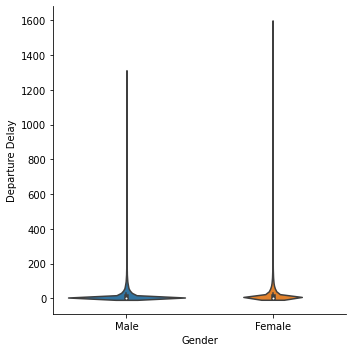

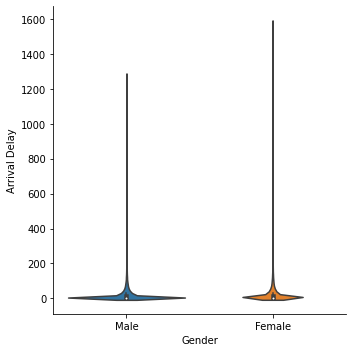

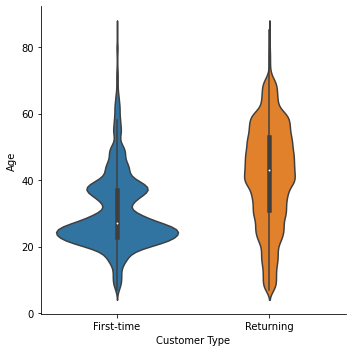

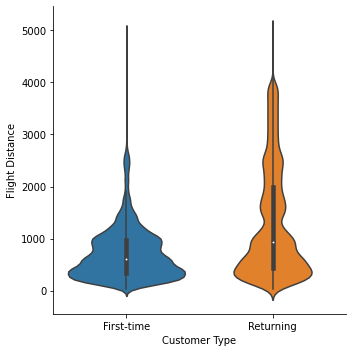

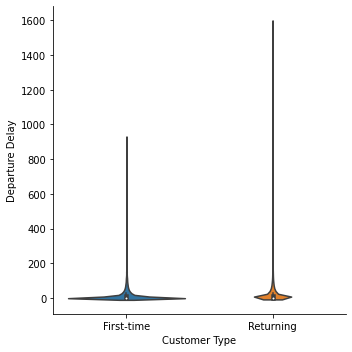

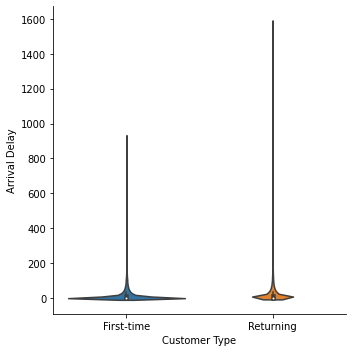

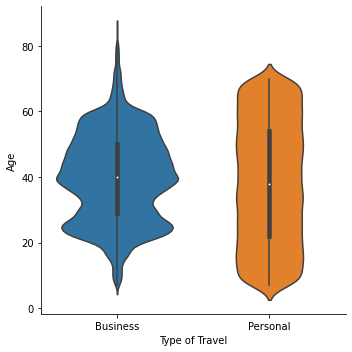

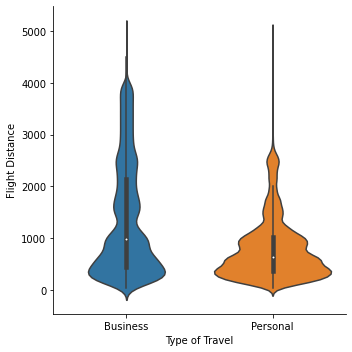

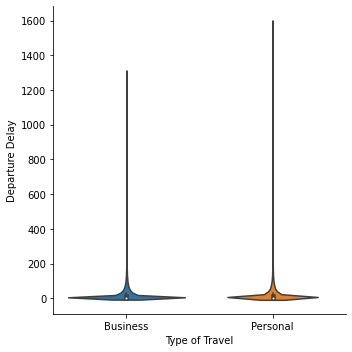

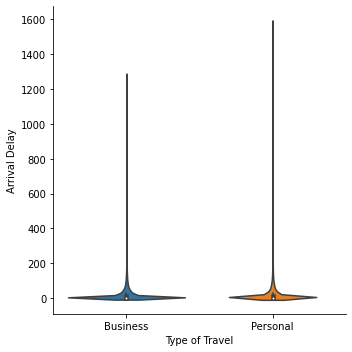

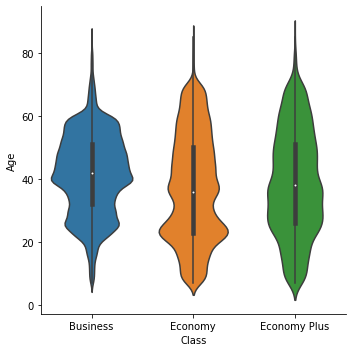

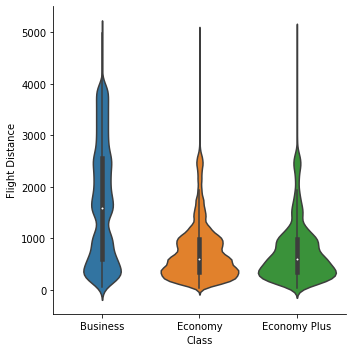

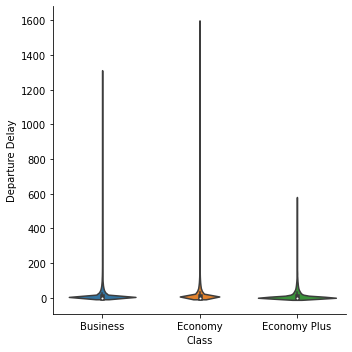

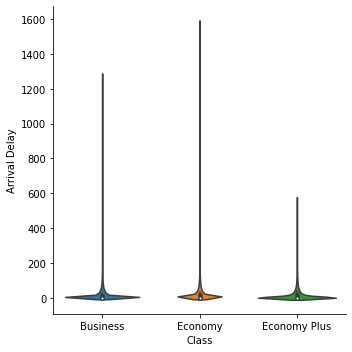

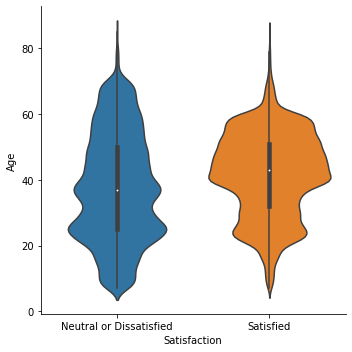

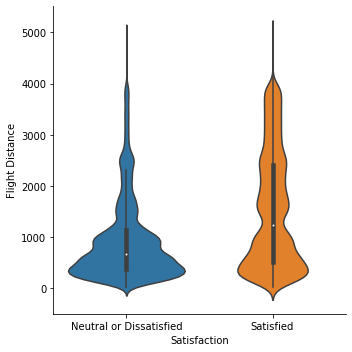

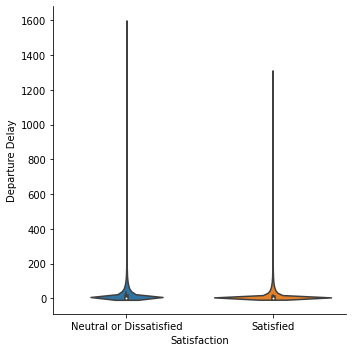

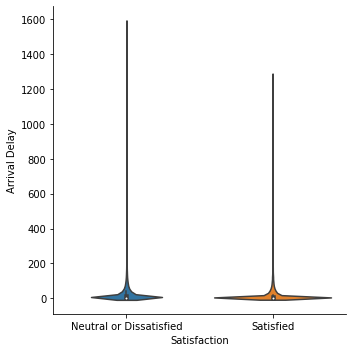

In [277]:
for i in categorical_columns:
    for j in cols1:
        sns.catplot(data=df,x=i,y=j,kind='violin')
        plt.show()

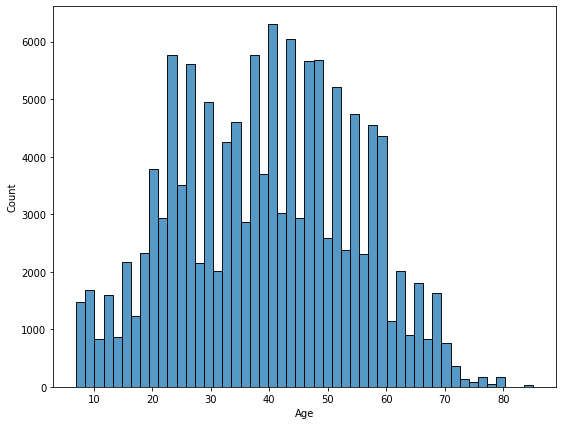

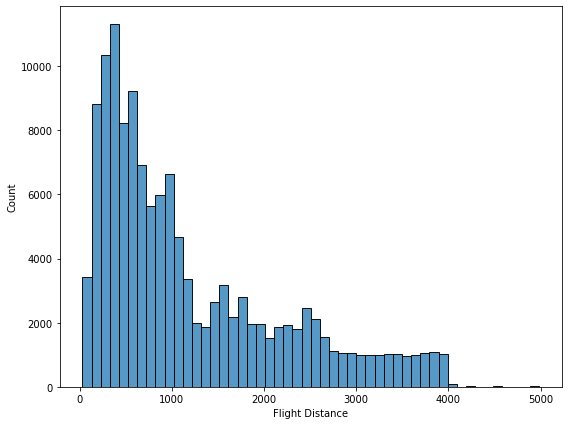

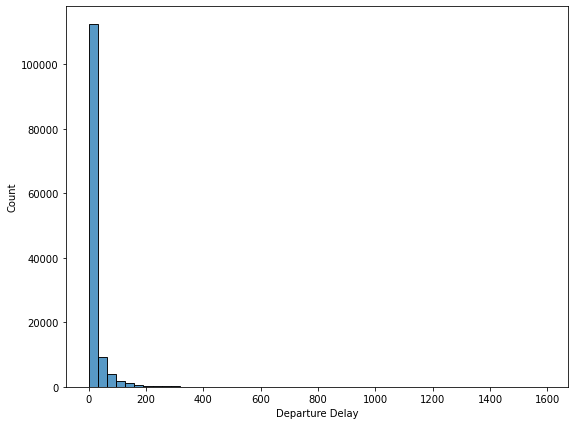

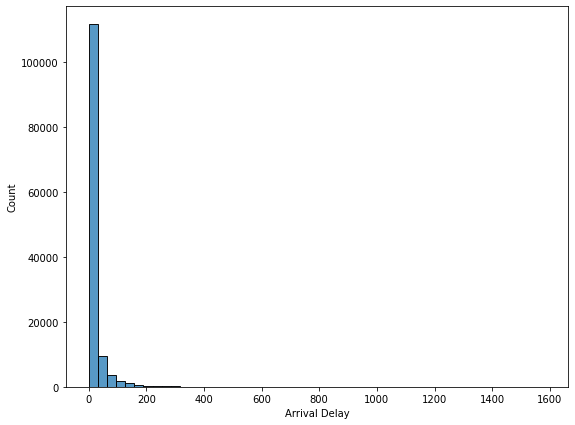

In [278]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.histplot(data=df,x=i,bins=50)
    plt.show()

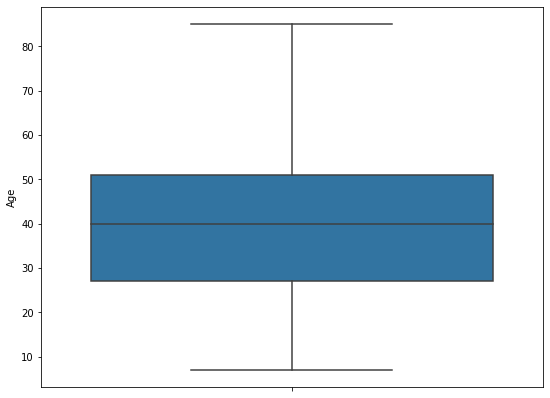

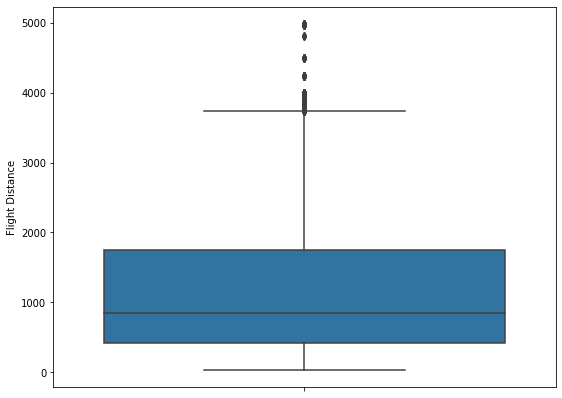

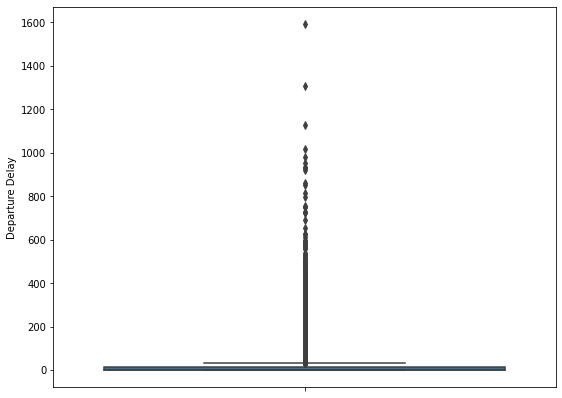

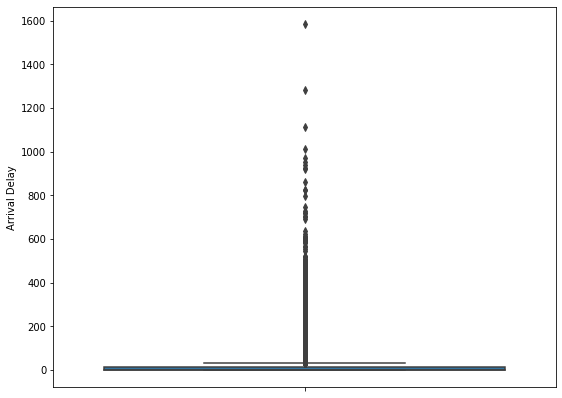

In [279]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.boxplot(data=df,y=i)
    plt.show()

In [280]:
df.dropna(subset=['Arrival Delay'],inplace=True)

In [281]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [282]:
df.shape

(129487, 23)

In [283]:
df=df[df['Flight Distance']<3600]

In [284]:
df.shape

(125224, 23)

In [285]:
df[df['Departure Delay']>50].shape

(10607, 23)

In [286]:
df=df[df['Departure Delay']<50]

In [287]:
df.shape

(114348, 23)

In [288]:
df[df['Arrival Delay']>25].shape

(9716, 23)

In [289]:
df=df[df['Arrival Delay']<25]

In [290]:
df.shape

(104022, 23)

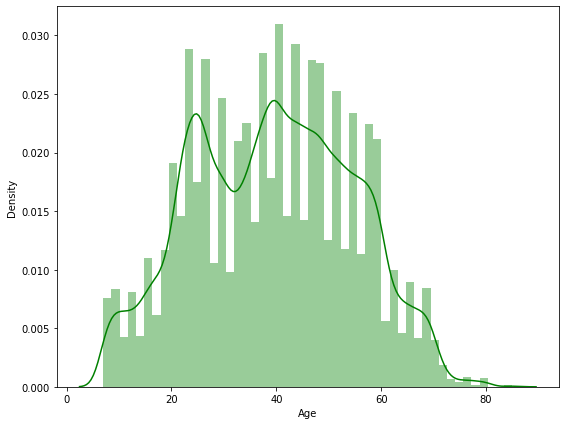

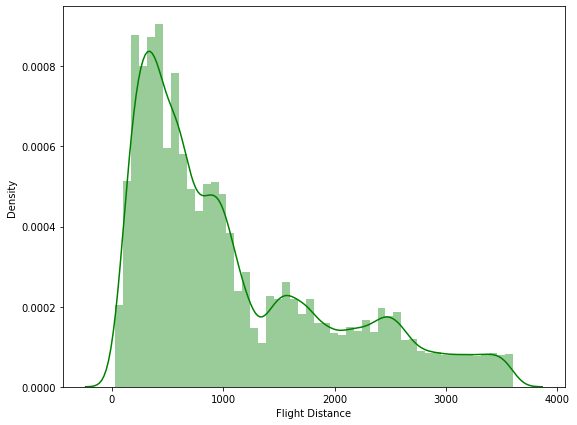

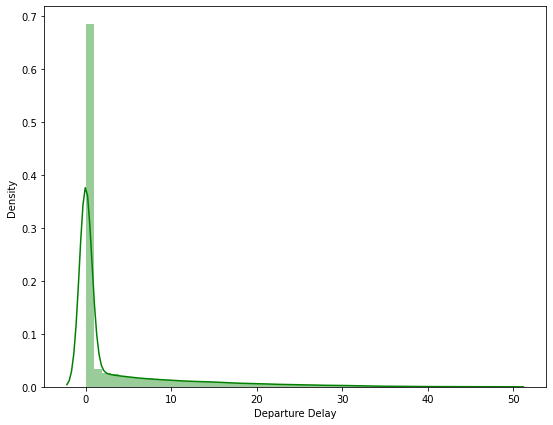

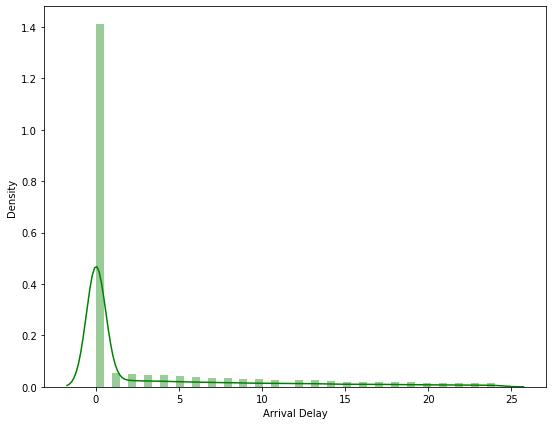

In [291]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],color='green')
    plt.show()

In [292]:
df[df['Age']>75].shape

(310, 23)

In [293]:
df=df[df['Age']<75]

In [294]:
df[df['Flight Distance']>3000].shape

(4998, 23)

In [295]:
df=df[df['Flight Distance']<3000]

In [296]:
df[df['Departure Delay']>10].shape

(13449, 23)

In [297]:
df=df[df['Departure Delay']<10]

In [298]:
df[df['Arrival Delay']>9].shape

(6150, 23)

In [299]:
df=df[df['Arrival Delay']<9]

In [300]:
df.shape

(76901, 23)

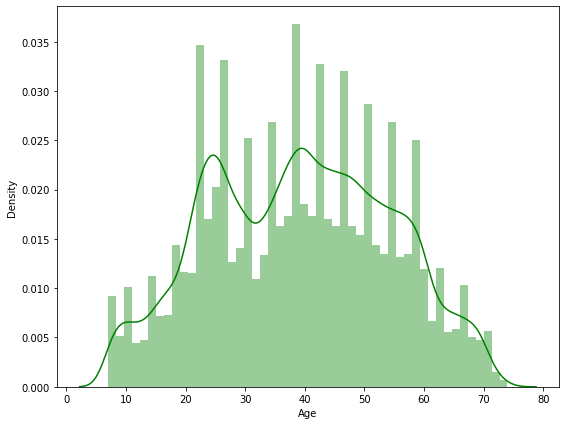

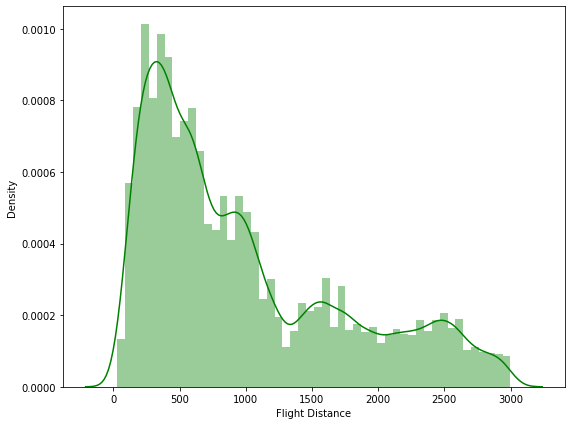

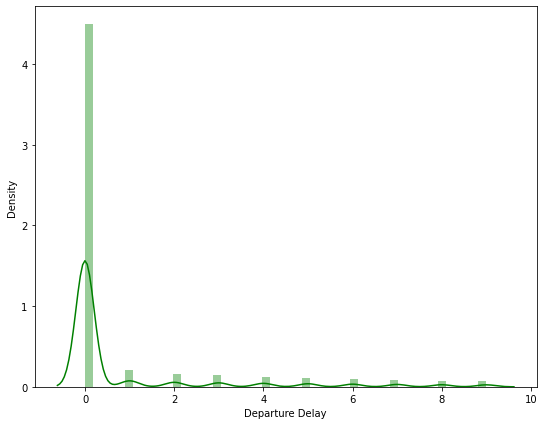

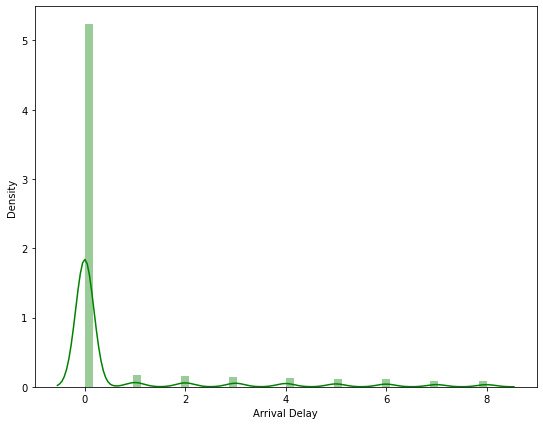

In [301]:
for i in cols1:
    plt.figure(figsize=(9,7))
    sns.distplot(df[i],color='green')
    plt.show()

In [302]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [303]:
cols2=['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

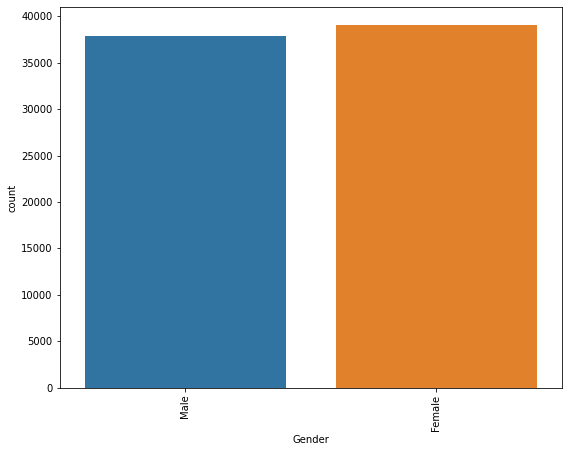

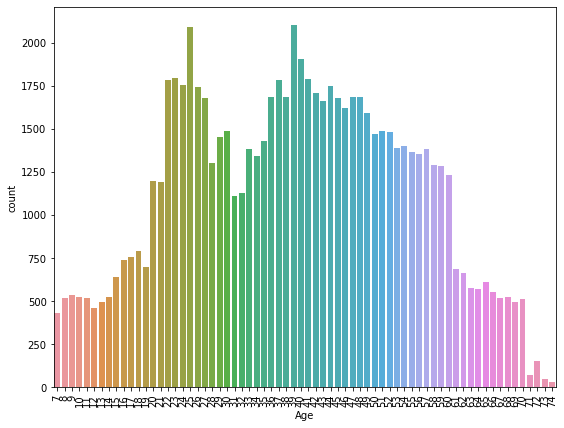

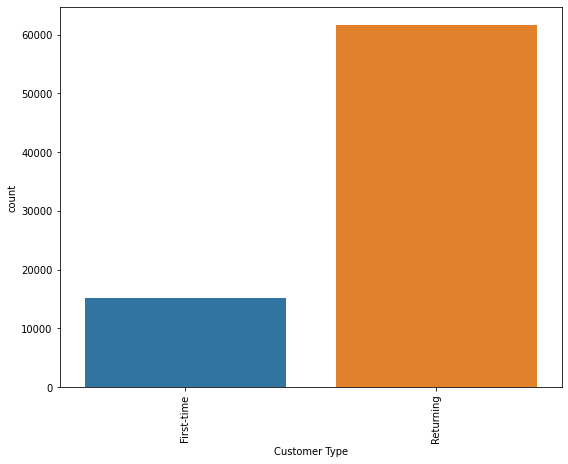

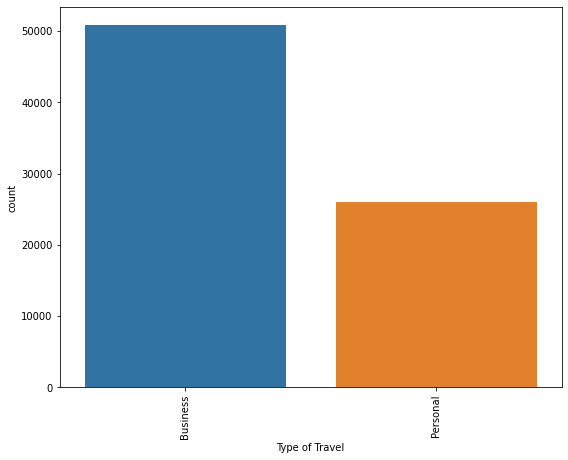

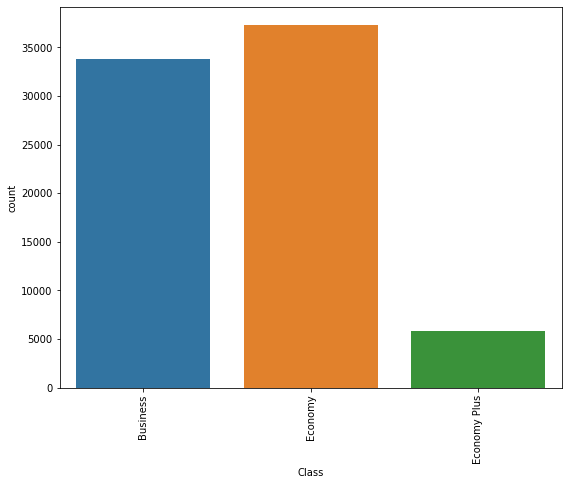

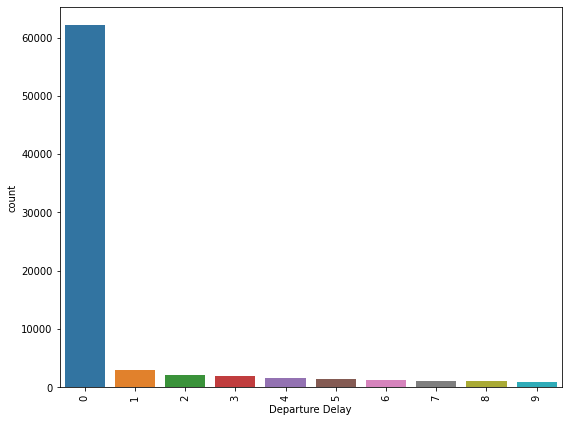

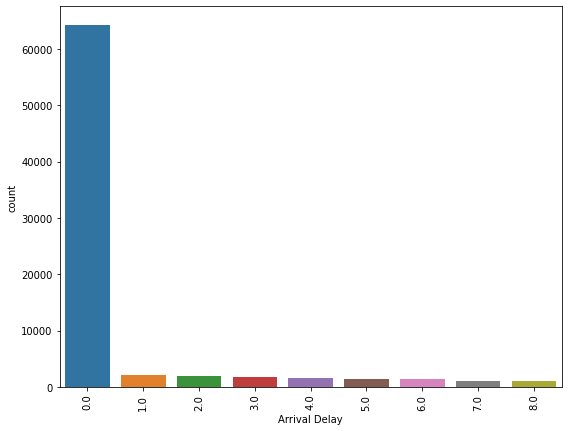

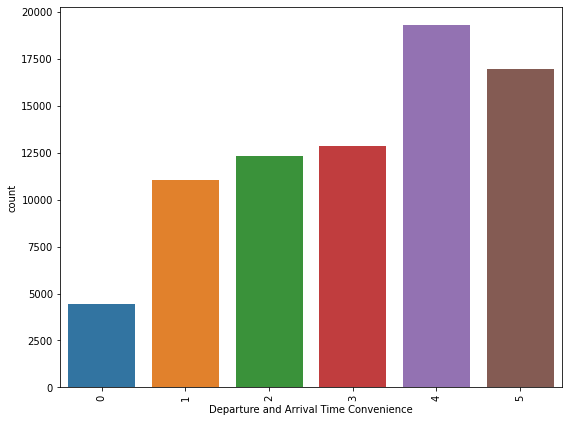

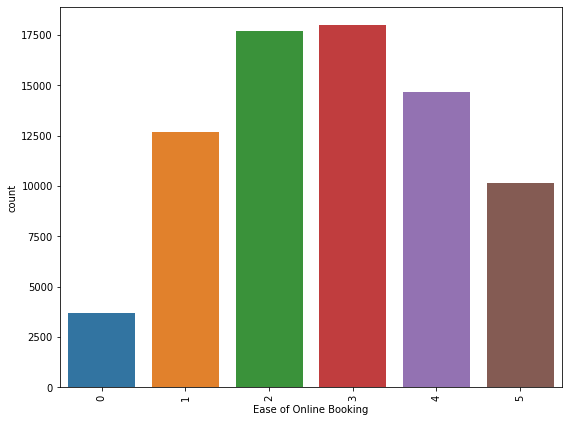

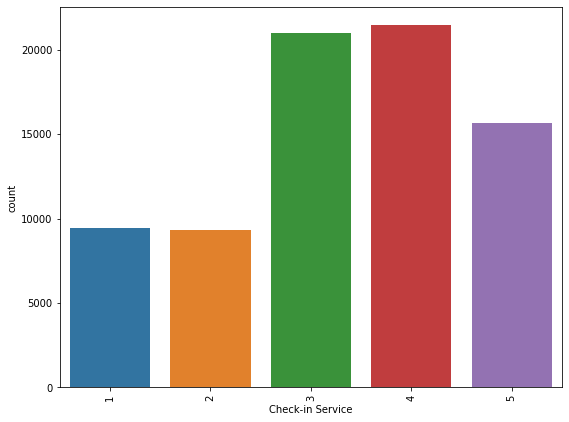

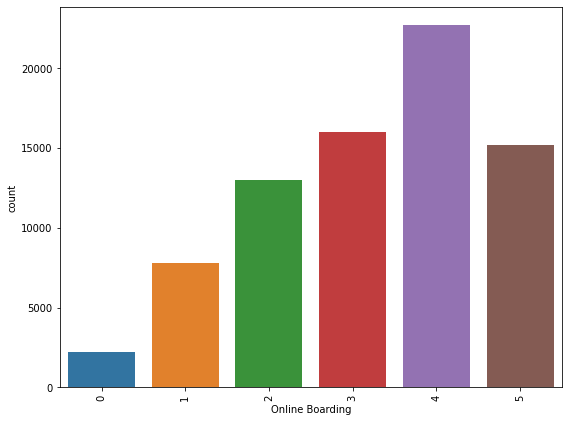

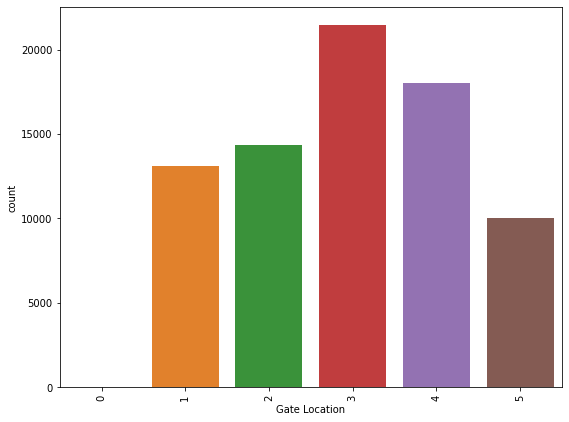

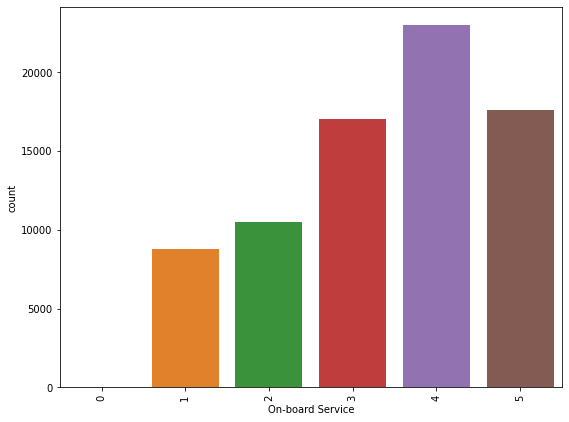

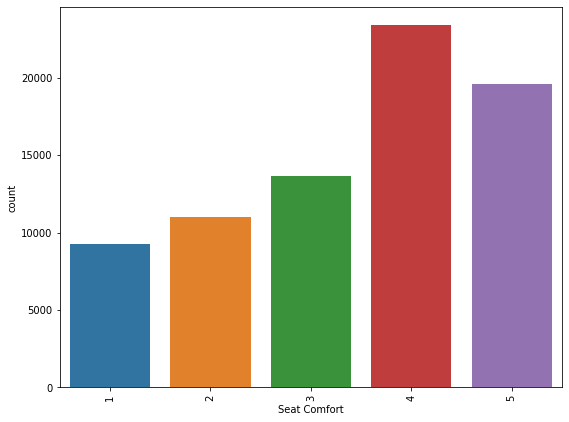

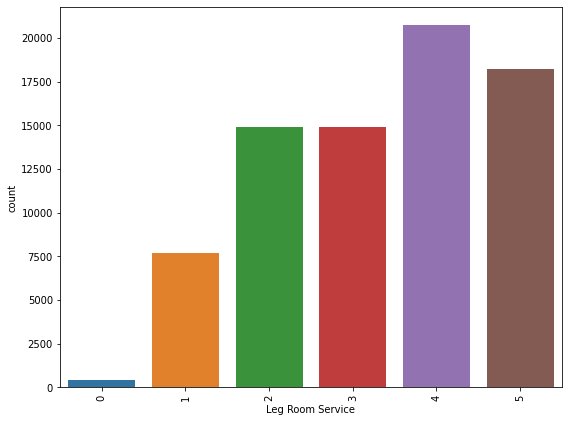

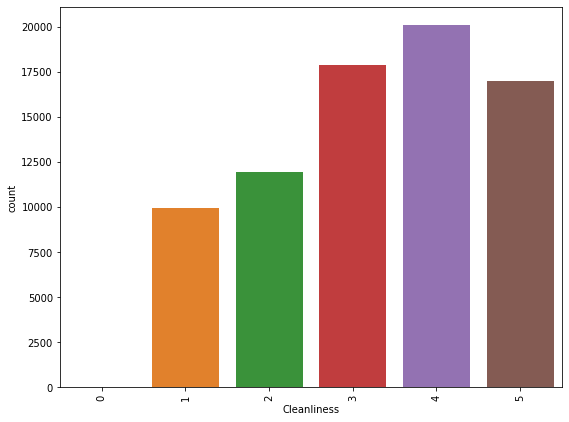

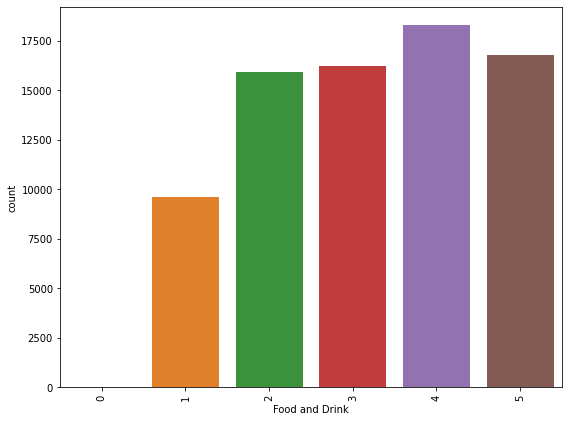

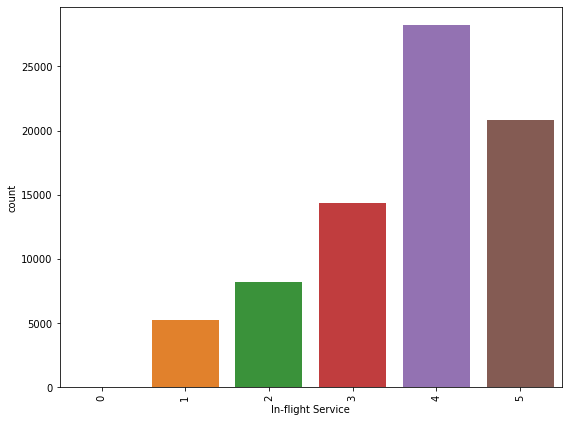

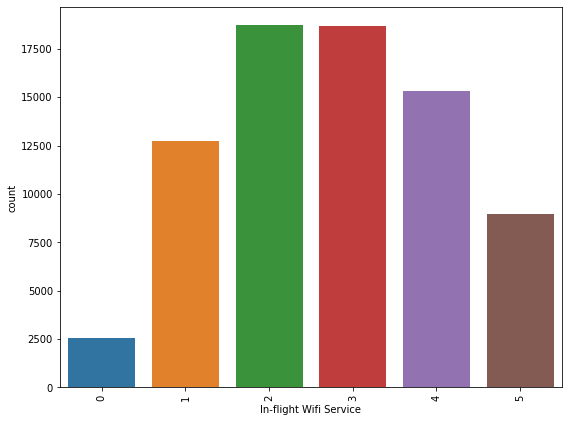

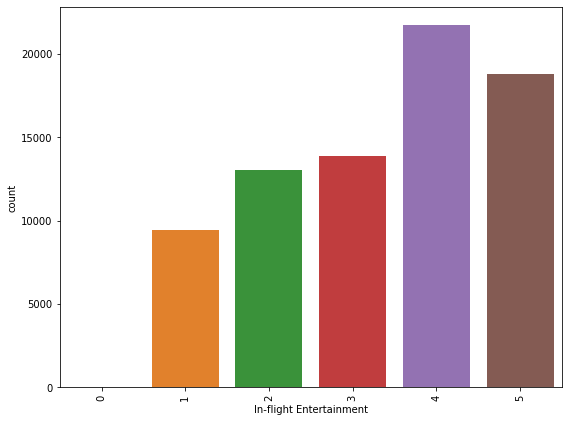

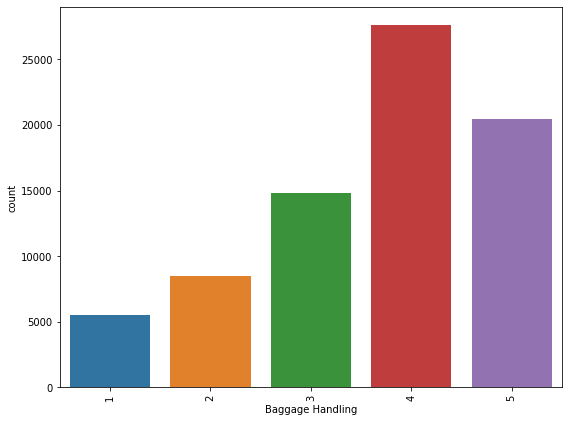

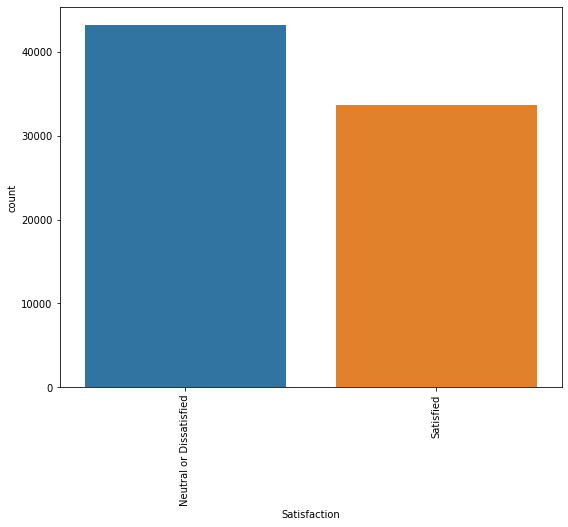

In [304]:
for i in cols2:
    plt.figure(figsize=(9,7))
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=90)
    plt.show()

In [305]:
df[df['Gate Location']==0].shape

(1, 23)

In [306]:
df=df[df['Gate Location']!=0]

In [307]:
df[df['On-board Service']==0].shape

(2, 23)

In [308]:
df=df[df['On-board Service']!=0]

In [309]:
df[df['Cleanliness']==0].shape

(7, 23)

In [310]:
df=df[df['Cleanliness']!=0]

In [311]:
df[df['Food and Drink']==0].shape

(28, 23)

In [312]:
df=df[df['Food and Drink']!=0]

In [313]:
df[df['In-flight Entertainment']==0].shape

(0, 23)

In [314]:
df.shape

(76863, 23)

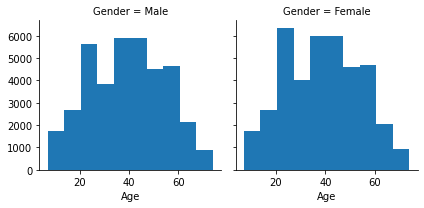

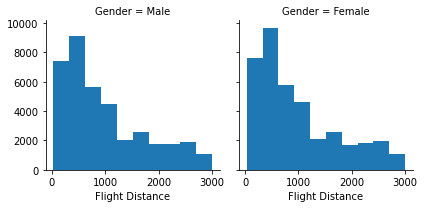

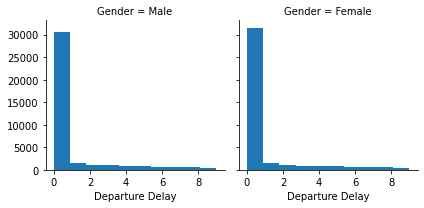

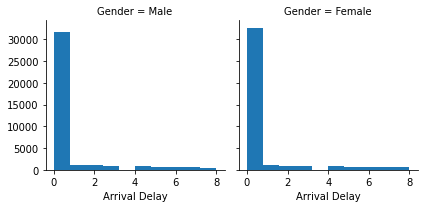

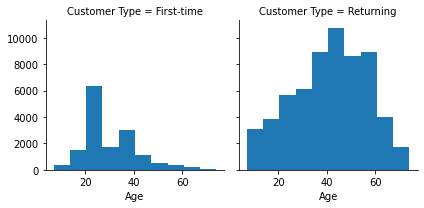

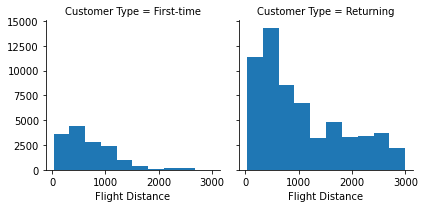

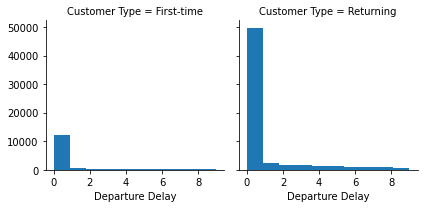

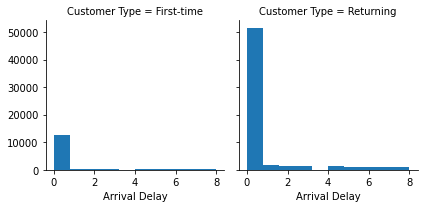

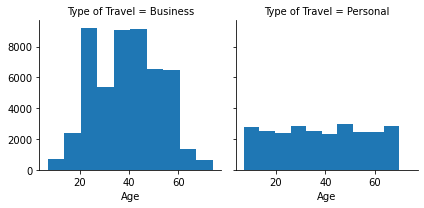

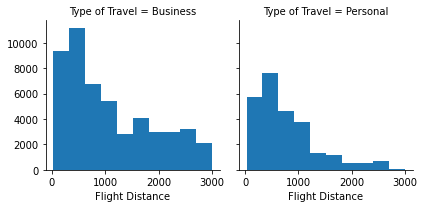

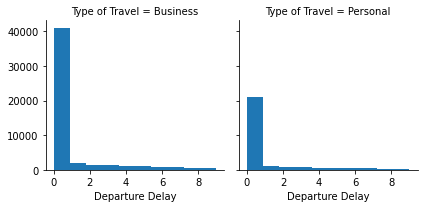

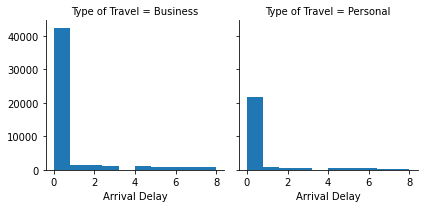

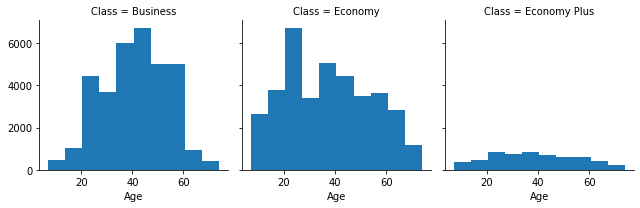

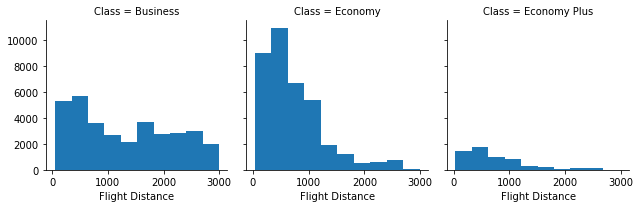

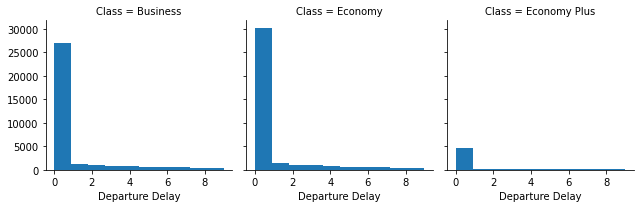

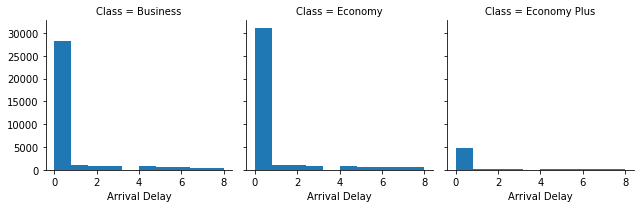

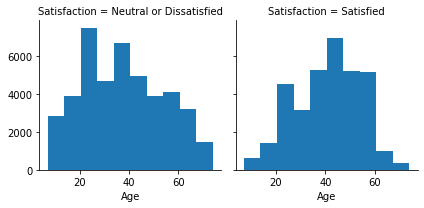

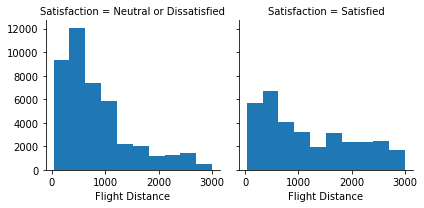

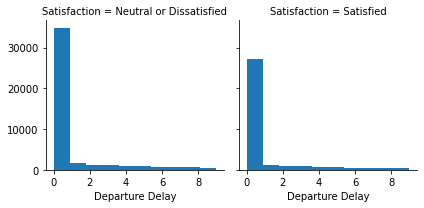

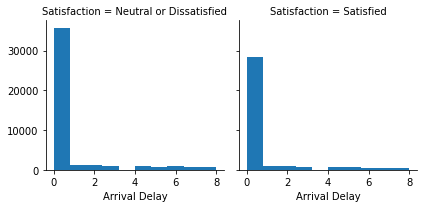

In [315]:
for i in categorical_columns:
    for j in cols1:
        b=sns.FacetGrid(data=df,col=i)
        b.map(plt.hist,j)
        plt.show()

In [316]:
df.shape

(76863, 23)

In [317]:
df.sample(5)

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
121231    Male   51     Returning       Business  Business             2075   
96251   Female   10     Returning       Personal   Economy              546   
81918     Male   44     Returning       Business  Business             1522   
21621   Female   28     Returning       Business   Economy              853   
98855     Male   50     Returning       Business  Business             1751   

        Departure Delay  Arrival Delay  \
121231                0            0.0   
96251                 0            0.0   
81918                 9            2.0   
21621                 0            0.0   
98855                 0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
121231                                       5                       5  ...   
96251                                        3                       3  ...   
81918                                        3                       3  ...   
21621                                        4                       4  ...   
98855                                        2                       2  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
121231                 5             5                 5            3   
96251                  2             3                 3            3   
81918                  2             5                 2            4   
21621                  1             2                 1            2   
98855                  5             5                 5            5   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
121231               2                  5                       5   
96251                3                  3                       3   
81918                5                  2                       3   
21621                2                  2                       2   
98855                2                  5                       2   

        In-flight Entertainment  Baggage Handling             Satisfaction  
121231                        5                 5                Satisfied  
96251                         3                 3  Neutral or Dissatisfied  
81918                         2                 2                Satisfied  
21621                         2                 2  Neutral or Dissatisfied  
98855                         5                 5                Satisfied  

[5 rows x 23 columns]

In [319]:
df['Satisfaction']=df['Satisfaction'].replace({'Satisfied':1,'Neutral or Dissatisfied':0})

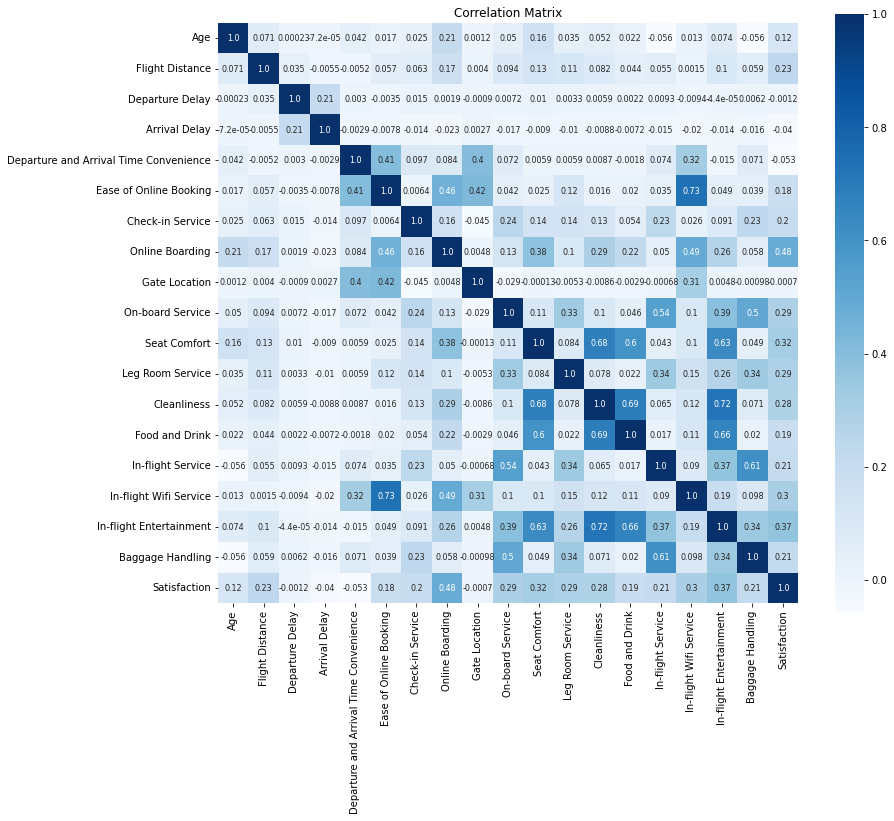

In [320]:
plt.figure(figsize=(13,11))
sns.heatmap(df.corr(numeric_only=True),annot=True,square=True,cbar=True,annot_kws={'size':8},fmt='.2',cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [322]:
pipeline=Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan,strategy='median')),
    ('std_scaler',StandardScaler())
])

In [323]:
categorical_columns

['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']

In [324]:
cat_col=['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [325]:
tr=ColumnTransformer([
    ('pipeline',pipeline,numerical_columns),
    ('one_hot',OneHotEncoder(drop='first'),cat_col)
])

In [326]:
X=df.drop(columns=['Satisfaction'],axis='colums')
y=df['Satisfaction']

In [327]:
X.head()

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
6    Male   43     Returning       Business  Business             1963   
7  Female   60     Returning       Business  Business              853   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
2                0            0.0                                       4   
3                0            0.0                                       2   
6                0            0.0                                       3   
7                0            3.0                                       3   

   Ease of Online Booking  ...  Gate Location  On-board Service  Seat Comfort  \
0                       3  ...              3                 3             5   
2                       4  ...              4                 3             5   
3                       2  ...              2                 5             5   
6                       3  ...              3                 5             5   
7                       4  ...              4                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
6                 5            4               5                  5   
7                 4            4               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  
0                       3                        5                 5  
2                       4                        3                 3  
3                       2                        5                 5  
6                       3                        5                 5  
7                       4                        3                 3  

[5 rows x 22 columns]

In [328]:
y

0         0
2         1
3         1
6         1
7         1
         ..
129873    0
129874    0
129875    0
129876    0
129879    0
Name: Satisfaction, Length: 76863, dtype: int64

In [329]:
X_tr=tr.fit_transform(X)

In [330]:
X_tr

array([[ 0.58801422, -0.21222198,  0.62008969, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12634725, -0.17003158, -0.40113213, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71991907,  1.21697786, -0.40113213, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.73103427, -0.7053223 ,  0.62008969, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.12634725, -0.88858685, -0.40113213, ...,  1.        ,
         0.        ,  1.        ],
       [-1.25865367, -0.8503518 , -0.40113213, ...,  1.        ,
         0.        ,  1.        ]])

In [331]:
y.value_counts()

Satisfaction
0    43214
1    33649
Name: count, dtype: int64

In [334]:
smote=SMOTE(sampling_strategy='minority')

In [336]:
X_sm,y_sm=smote.fit_resample(X_tr,y)

In [338]:
y_sm.value_counts()

Satisfaction
0    43214
1    43214
Name: count, dtype: int64

In [340]:
X_sm

array([[ 0.58801422, -0.21222198,  0.62008969, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12634725, -0.17003158, -0.40113213, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.71991907,  1.21697786, -0.40113213, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65449643, -0.93850968,  4.19436607, ...,  0.        ,
         0.        ,  0.        ],
       [-0.18076696,  0.06860258, -0.40113213, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.4080578 ,  2.53502163, -0.40113213, ...,  0.        ,
         0.        ,  0.        ]])

In [341]:
len(X_sm)

86428

In [342]:
len(y_sm)

86428

In [343]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=101,stratify=y_sm,shuffle=True)

In [344]:
X_train.shape

(69142, 23)

In [345]:
X_test.shape

(17286, 23)

In [375]:
rf=RandomForestClassifier()
rf_c=cross_val_score(rf,X_train,y_train,cv=5)
rf_c.mean()

0.9573486608708588

In [376]:
dt=DecisionTreeClassifier()
dt_c=cross_val_score(dt,X_train,y_train,cv=5)
dt_c.mean()

0.9398628644307543

In [377]:
lr=LogisticRegression()
lr_c=cross_val_score(lr,X_train,y_train,cv=5)
lr_c.mean()

0.8602007383753121

In [379]:
et=ExtraTreesClassifier()
et_c=cross_val_score(et,X_train,y_train,cv=5)
et_c.mean()

0.9574209486242484

In [383]:
gb=GradientBoostingClassifier()
gb_c=cross_val_score(gb,X_train,y_train,cv=5)
gb_c.mean()

0.9411934937445056

In [385]:
xg=XGBClassifier()
xg_c=cross_val_score(xg,X_train,y_train,cv=5)
xg_c.mean()

0.9581874872625479

In [389]:
vc=VotingClassifier([('rf',rf),('et',et),('gb',gb),('xg',xg)])
vc_c=cross_val_score(vc,X_train,y_train,cv=5)
vc_c.mean()

0.9573486368157301

In [390]:
vc.fit(X_train,y_train)

VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                             ('et', ExtraTreesClassifier()),
                             ('gb', GradientBoostingClassifier()),
                             ('xg',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_typ...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [391]:
y_pred=vc.predict(X_test)

In [392]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      8643
           1       0.98      0.94      0.96      8643

    accuracy                           0.96     17286
   macro avg       0.96      0.96      0.96     17286
weighted avg       0.96      0.96      0.96     17286



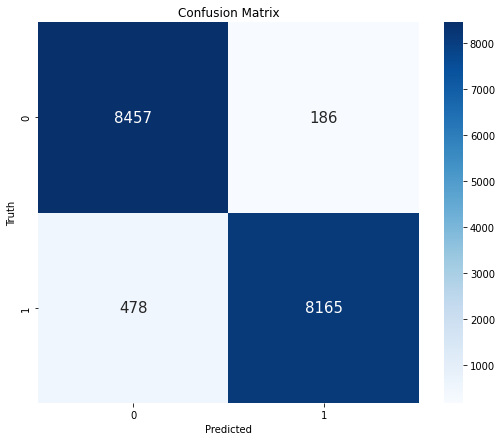

In [393]:
plt.figure(figsize=(9,7))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,square=True,cbar=True,annot_kws={'size':15},fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()